# Load Data:

In [1]:
import pandas as pd

# Load data into a Pandas DataFrame
#df = pd.read_csv('Books_rating.csv')
df = pd.read_csv('Books_rating.csv')

# Display the first few rows of the DataFrame to inspect the data
print(df.head())

           Id                           Title  Price         User_id  \
0  1882931173  Its Only Art If Its Well Hung!    NaN   AVCGYZL8FQQTD   
1  0826414346        Dr. Seuss: American Icon    NaN  A30TK6U7DNS82R   
2  0826414346        Dr. Seuss: American Icon    NaN  A3UH4UZ4RSVO82   
3  0826414346        Dr. Seuss: American Icon    NaN  A2MVUWT453QH61   
4  0826414346        Dr. Seuss: American Icon    NaN  A22X4XUPKF66MR   

                          profileName review/helpfulness  review/score  \
0               Jim of Oz "jim-of-oz"                7/7           4.0   
1                       Kevin Killian              10/10           5.0   
2                        John Granger              10/11           5.0   
3  Roy E. Perry "amateur philosopher"                7/7           4.0   
4     D. H. Richards "ninthwavestore"                3/3           4.0   

   review/time                                   review/summary  \
0    940636800           Nice collection of Julie Strai

# Clean Data:

In [2]:
df = df.drop(['Id' , 'Title' , 'Price','User_id','profileName','review/helpfulness','review/time','review/summary'], axis=1)
df = df.rename(columns={"review/text":"review" , "review/score":"label"})

# Remove rows with any missing values
df = df.dropna()

# Remove duplicate entries based on all columns
df = df.drop_duplicates()

df.head()

,label,review
0,4.0,This is only for Julie Strain fans. It's a col...
1,5.0,I don't care much for Dr. Seuss but after read...
2,5.0,"If people become the books they read and if ""t..."
3,4.0,"Theodore Seuss Geisel (1904-1991), aka &quot;D..."
4,4.0,Philip Nel - Dr. Seuss: American IconThis is b...


In [3]:
df["label"].value_counts()

5.0    1230218
4.0     400670
3.0     176933
1.0     146501
2.0     108983
Name: label, dtype: int64

In [4]:
def mark_sentiment(rating):
    if(rating > 3.0):
        return 2
    elif (rating == 3.0):
        return 1
    else:
        return 0
df["label"] = df['label'].apply(lambda x:mark_sentiment(x))
df["label"].value_counts()

2    1630888
0     255484
1     176933
Name: label, dtype: int64

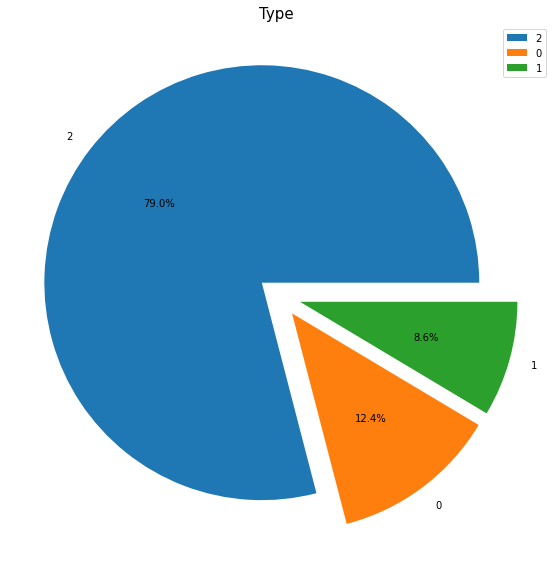

In [5]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10, 10)
labels=[2,0,1]
plt.pie(df['label'].value_counts(),explode =(0.1,0.1,0.1), labels=labels,autopct='%1.1f%%')
plt.title('Type ', fontsize = 15)
plt.axis('off')
plt.legend()
plt.show()

## Balance Classes

In [6]:
class_0 = df[df["label"] == 0]
class_0  = class_0.iloc[:5000]
class_1 = df[df["label"] == 1]
class_1  = class_1.iloc[:5000]
class_2 = df[df["label"] == 2]
class_2  = class_2.iloc[:5000]
df = pd.concat([class_2 , class_0 , class_1])

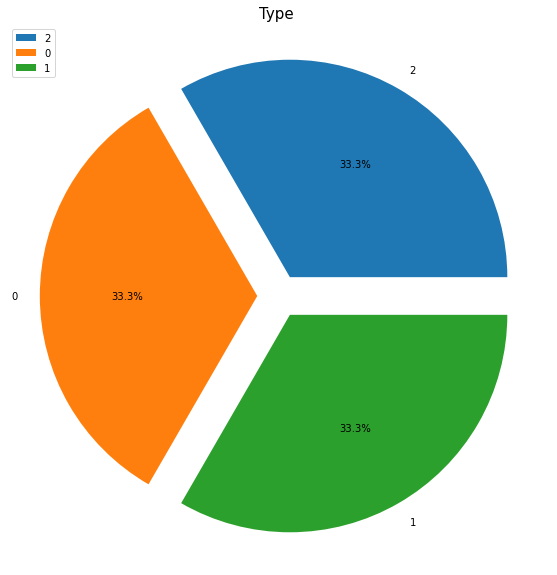

In [7]:
plt.rcParams['figure.figsize'] = (10, 10)
labels=[2,0,1]
plt.pie(df['label'].value_counts(),explode =(0.1,0.1,0.1), labels=labels,autopct='%1.1f%%')
plt.title('Type ', fontsize = 15)
plt.axis('off')
plt.legend()
plt.show()

In [8]:
# Define a function to categorize review scores into labels
def categorize_sentiment(score):
    if score == 2:
        return 'positive'
    elif score == 0:
        return 'negative'
    else:
        return 'neutral'

# Apply the function to create a new column 'sentiment' in the DataFrame
df['sentiment'] = df['label'].apply(categorize_sentiment)

# Check the updated DataFrame with the new 'sentiment' and 'sentiment_label' columns
print(df.head())

   label                                             review sentiment
0      2  This is only for Julie Strain fans. It's a col...  positive
1      2  I don't care much for Dr. Seuss but after read...  positive
2      2  If people become the books they read and if "t...  positive
3      2  Theodore Seuss Geisel (1904-1991), aka &quot;D...  positive
4      2  Philip Nel - Dr. Seuss: American IconThis is b...  positive


# Text Cleaning:

In [9]:
# Convert text to lowercase
df['review'] = df['review'].str.lower()

df.head()

,label,review,sentiment
0,2,this is only for julie strain fans. it's a col...,positive
1,2,i don't care much for dr. seuss but after read...,positive
2,2,"if people become the books they read and if ""t...",positive
3,2,"theodore seuss geisel (1904-1991), aka &quot;d...",positive
4,2,philip nel - dr. seuss: american iconthis is b...,positive


In [10]:
import re

# Remove special characters, punctuation, and extra whitespace
df['review'] = df['review'].apply(lambda x: re.sub(r'[^a-zA-Z0-9\s]', '', x))

# Remove extra whitespace
df['review'] = df['review'].apply(lambda x: re.sub(r'\s+', ' ', x).strip())

df.head()

,label,review,sentiment
0,2,this is only for julie strain fans its a colle...,positive
1,2,i dont care much for dr seuss but after readin...,positive
2,2,if people become the books they read and if th...,positive
3,2,theodore seuss geisel 19041991 aka quotdr seus...,positive
4,2,philip nel dr seuss american iconthis is basic...,positive


In [11]:
df['label'].value_counts()

2    2000
0    2000
1    2000
Name: label, dtype: int64

# Data Augmentation:

In [12]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('omw')
nltk.download('punkt')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\slaks\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\slaks\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw to
[nltk_data]     C:\Users\slaks\AppData\Roaming\nltk_data...
[nltk_data]   Package omw is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\slaks\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [13]:
import random
import nltk
from nltk.corpus import wordnet
import pandas as pd

# Define a function to replace words with their synonyms
def synonym_replacement(text):
    words = nltk.word_tokenize(text)
    new_words = []
    for word in words:
        syns = wordnet.synsets(word)
        if syns:
            new_word = syns[0].lemmas()[0].name()
            if new_word != word:
                new_words.append(new_word)
            else:
                new_words.append(word)
        else:
            new_words.append(word)
    return ' '.join(new_words)

# Define a function to shuffle the order of words in a sentence
def word_shuffle(text):
    words = nltk.word_tokenize(text)
    random.shuffle(words)
    return ' '.join(words)

# Define a function to add noise to the text
def add_noise(text, noise_level=0.1):
    words = nltk.word_tokenize(text)
    noisy_words = []
    for word in words:
        if random.random() < noise_level:
            noisy_words.append(''.join(random.sample(word, len(word))))
        else:
            noisy_words.append(word)
    return ' '.join(noisy_words)

In [14]:
# Augment the training data
augmented_data = []
for index, row in df.iterrows():
    text, label = row['review'], row['label']
    augmented_text = synonym_replacement(text)
    augmented_text = word_shuffle(augmented_text)
    augmented_text = add_noise(augmented_text)
    augmented_data.append({'review': augmented_text, 'label': label})
augmented_df = pd.DataFrame(augmented_data)
df = pd.concat([df, augmented_df], ignore_index=True)

# Data Preprocessing:

In [15]:
def clean_text(text):
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    words = text.split()
    words = [word for word in words if word not in stop_words]
    text = ' '.join(words)
    
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    words = text.split()
    words = [lemmatizer.lemmatize(word) for word in words]
    text = ' '.join(words)
    
    return text

In [16]:
df['review'] = df['review'].apply(lambda x:clean_text(x))

# Text Tokenization:

In [17]:
df['review'] = df['review'].astype(str)

import nltk
from nltk.tokenize import word_tokenize

# Download NLTK resources (only required once)
nltk.download('punkt')

# Tokenize the review text and store it in a new column 'tokens'
df['tokens'] = df['review'].apply(word_tokenize)

print(df['tokens'])

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\slaks\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


0        [julie, strain, fan, collection, photo, 80, pa...
1        [dont, care, much, dr, seuss, reading, philip,...
2        [people, become, book, read, child, father, ma...
3        [theodore, seuss, geisel, 19041991, aka, quotd...
4        [philip, nel, dr, seuss, american, iconthis, b...
                               ...                        
11995    [remedy, book, explorer, disfigerment, interes...
11996    [stallion, genre, juvenile, lightweight, narra...
11997    [felt, found, insistent, information_technolog...
11998    [abnormal, previously, expect, evening, side, ...
11999    [bland, freak, angstrom, tmeh, hte, egart, Ore...
Name: tokens, Length: 12000, dtype: object


In [18]:
df['tokens']

0        [julie, strain, fan, collection, photo, 80, pa...
1        [dont, care, much, dr, seuss, reading, philip,...
2        [people, become, book, read, child, father, ma...
3        [theodore, seuss, geisel, 19041991, aka, quotd...
4        [philip, nel, dr, seuss, american, iconthis, b...
                               ...                        
11995    [remedy, book, explorer, disfigerment, interes...
11996    [stallion, genre, juvenile, lightweight, narra...
11997    [felt, found, insistent, information_technolog...
11998    [abnormal, previously, expect, evening, side, ...
11999    [bland, freak, angstrom, tmeh, hte, egart, Ore...
Name: tokens, Length: 12000, dtype: object

## Data Visualisation

### 1. Histogram:

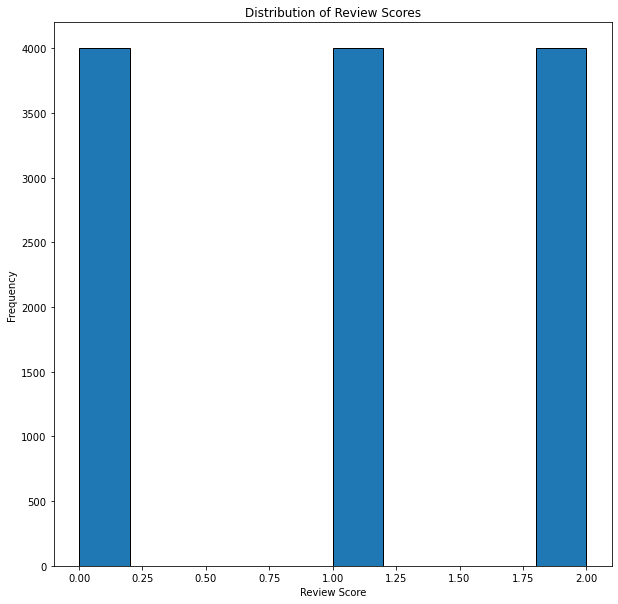

In [19]:
import matplotlib.pyplot as plt

# Example: Visualize distribution of review scores
plt.hist(df['label'], bins=10, edgecolor='black')
plt.xlabel('Review Score')
plt.ylabel('Frequency')
plt.title('Distribution of Review Scores')
plt.show()

### 2. Bar Chart:

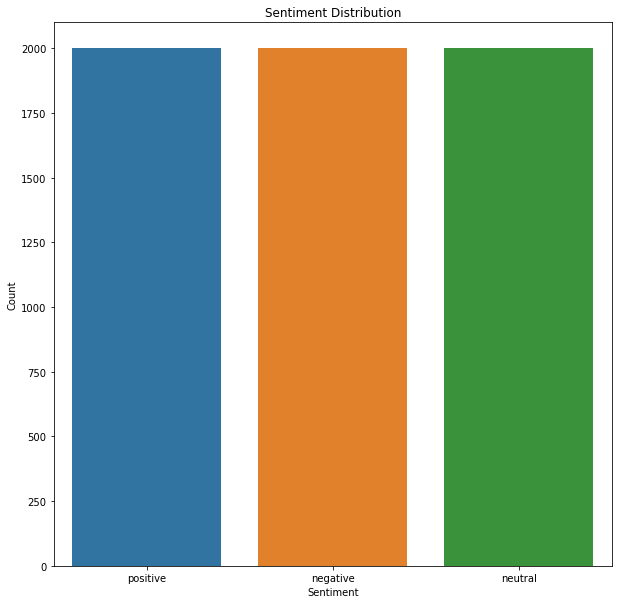

In [20]:
import seaborn as sns

# Example: Visualize the count of each sentiment class
sns.countplot(x='sentiment', data=df)
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Distribution')
plt.show()

### 3. Scatter Plot:

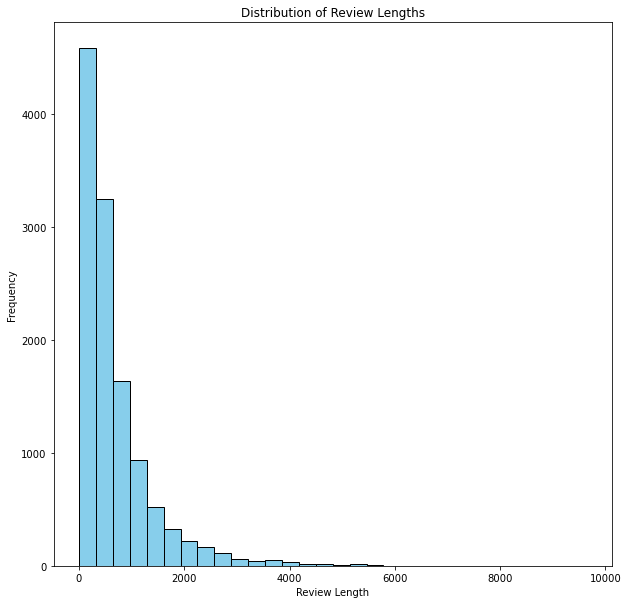

In [21]:
df['review_length'] = df['review'].apply(len)
plt.hist(df['review_length'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Review Length')
plt.ylabel('Frequency')
plt.title('Distribution of Review Lengths')
plt.show()

### 4. Pie Chart of Sentiment Distribution:

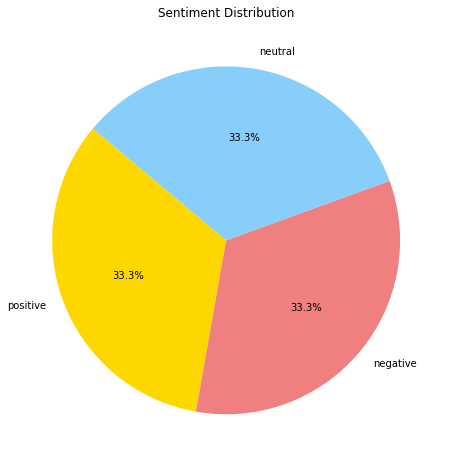

In [22]:
colors = ['gold', 'lightcoral', 'lightskyblue']
sentiment_counts = df['sentiment'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', colors=colors, startangle=140)
plt.title('Sentiment Distribution')
plt.show()

### 5. Heatmap:

In [23]:
# # Example: Visualize the correlation matrix between numerical features
# correlation_matrix = df.corr()
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
# plt.title('Correlation Matrix Heatmap')
# plt.show()

### 6. Word Cloud:

In [24]:
# !pip install wordcloud

# from wordcloud import WordCloud

# # Word cloud for positive sentiment
# positive_reviews = ' '.join(df[df['sentiment'] == 'positive']['review'])
# wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(positive_reviews)
# plt.figure(figsize=(10, 5))
# plt.imshow(wordcloud_positive, interpolation='bilinear')
# plt.axis('off')
# plt.title('Word Cloud for Positive Sentiment')
# plt.show()

# # Word cloud for negative sentiment
# negative_reviews = ' '.join(df[df['sentiment'] == 'negative']['review'])
# wordcloud_negative = WordCloud(width=800, height=400, background_color='white').generate(negative_reviews)
# plt.figure(figsize=(10, 5))
# plt.imshow(wordcloud_negative, interpolation='bilinear')
# plt.axis('off')
# plt.title('Word Cloud for Negative Sentiment')
# plt.show()

# # Word cloud for neutral sentiment
# neutral_reviews = ' '.join(df[df['sentiment'] == 'neutral']['review'])
# wordcloud_neutral = WordCloud(width=800, height=400, background_color='white').generate(neutral_reviews)
# plt.figure(figsize=(10, 5))
# plt.imshow(wordcloud_neutral, interpolation='bilinear')
# plt.axis('off')
# plt.title('Word Cloud for Neutral Sentiment')
# plt.show()


### 7. Heatmap of Sentiment Scores vs. Review Lengths:

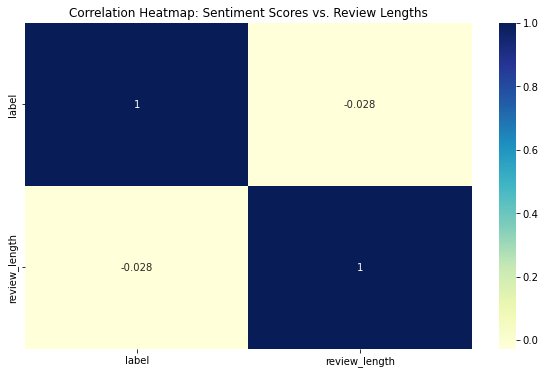

In [25]:
plt.figure(figsize=(10, 6))
sns.heatmap(df[['label', 'review_length']].corr(), annot=True, cmap='YlGnBu')
plt.title('Correlation Heatmap: Sentiment Scores vs. Review Lengths')
plt.show()

### 8. Box Plot of Review Lengths by Sentiment:


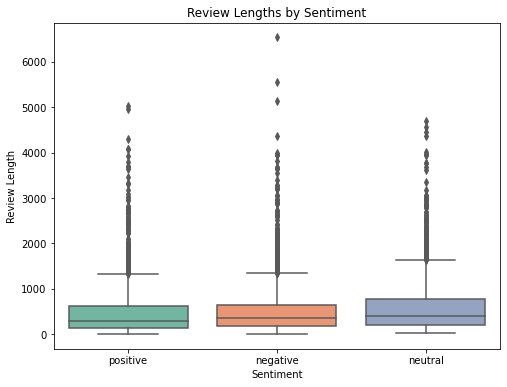

In [26]:

plt.figure(figsize=(8, 6))
sns.boxplot(x='sentiment', y='review_length', data=df, palette='Set2')
plt.xlabel('Sentiment')
plt.ylabel('Review Length')
plt.title('Review Lengths by Sentiment')
plt.show()

### 9. Pair Plot for Sentiment Analysis:

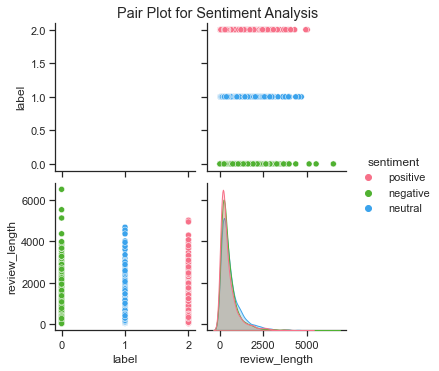

In [27]:
sns.set(style="ticks")
sns.pairplot(df, hue='sentiment', palette='husl')
plt.suptitle('Pair Plot for Sentiment Analysis', y=1.02)
plt.show()


### 10. Violin Plot of Review Lengths by Sentiment:

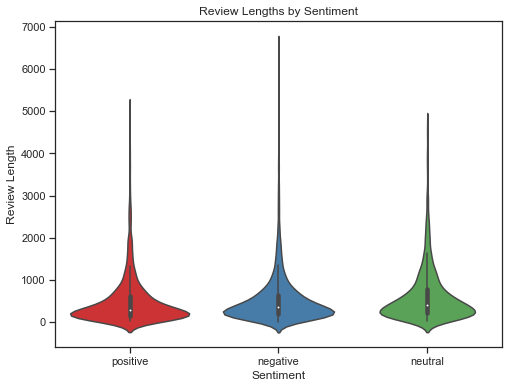

In [28]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='sentiment', y='review_length', data=df, palette='Set1')
plt.xlabel('Sentiment')
plt.ylabel('Review Length')
plt.title('Review Lengths by Sentiment')
plt.show()



### 11. Count Plot with Palette:

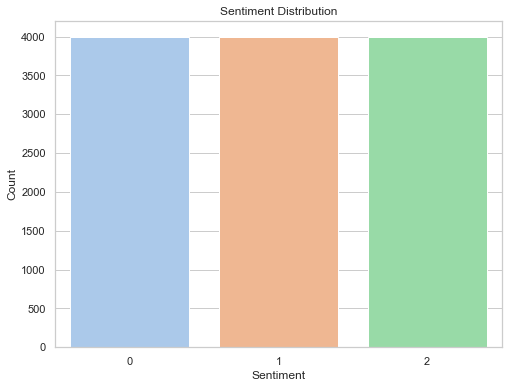

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")  # Set the style of the plot
palette = sns.color_palette("pastel")  # Define a custom color palette

plt.figure(figsize=(8, 6))  # Set the size of the plot

# Create a count plot for the 'label' column with the specified palette
sns.countplot(x='label', data=df, palette=palette)

# Add labels and title to the plot
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Distribution')
plt.show()  # Show the plot

# Split data:

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Convert tokens to text (list of words to space-separated string)
df['text'] = df['tokens'].apply(lambda tokens: ' '.join(tokens))

# Create a TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(lowercase=True, max_features=10000)

In [31]:
from sklearn.model_selection import train_test_split

# Split the data into features (X) and labels (y)
X = df['review']  # Features
y = df['label']  # Labels

# Split the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model building:

## Naive Bayes

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

# Create a pipeline with TF-IDF vectorizer and Naive Bayes classifier
model = Pipeline([
    ('tfidf', tfidf_vectorizer),  # Convert text to numerical features using TF-IDF
    ('classifier', MultinomialNB())  # Naive Bayes classifier
])

# Train the model on the training data
model.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer(max_features=10000)),
                ('classifier', MultinomialNB())])

In [33]:
from sklearn.metrics import accuracy_score, classification_report

# Predictions on the test data
predictions = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy:.2f}')

# Generate a detailed classification report
print(classification_report(y_test, predictions))

Accuracy: 0.75
              precision    recall  f1-score   support

           0       0.72      0.72      0.72       798
           1       0.71      0.69      0.70       819
           2       0.82      0.85      0.83       783

    accuracy                           0.75      2400
   macro avg       0.75      0.75      0.75      2400
weighted avg       0.75      0.75      0.75      2400



### Feature Importance (For Naive Bayes):

#### Naive Bayes models don't have feature importances like some other models, but we can still analyze the most informative features using coefficients. Using TF-IDF, we can see the most important terms for each class.

In [34]:
# Get feature names from the TfidfVectorizer
feature_names = tfidf_vectorizer.get_feature_names_out()

# Get top N features for each class (assuming binary classification)
for i, class_label in enumerate(model.classes_):
    top_features_idx = model.named_steps['classifier'].feature_log_prob_[i].argsort()[::-1][:10]
    top_features = [feature_names[idx] for idx in top_features_idx]
    print(f'Top features for class {class_label}: {", ".join(top_features)}')

Top features for class 0: book, iodine, angstrom, information_technology, inch, washington, read, one, like, merely
Top features for class 1: angstrom, book, iodine, information_technology, inch, washington, read, merely, good, arsenic
Top features for class 2: book, angstrom, iodine, information_technology, read, inch, great, one, washington, love


### Confusion Matrix 

A confusion matrix allows you to visualize the performance of classifier by showing the true positive, true negative, false positive, and false negative values

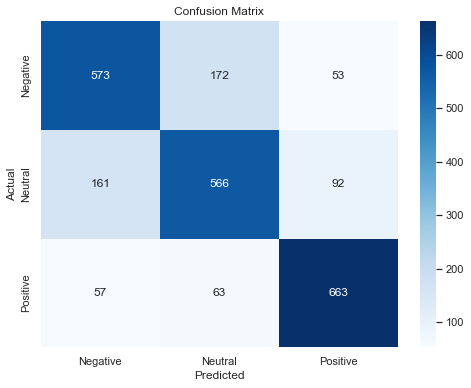

In [35]:
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


### Visualising Receiver Operating Characteristic (ROC) curve and the Area Under the Curve (AUC) score,

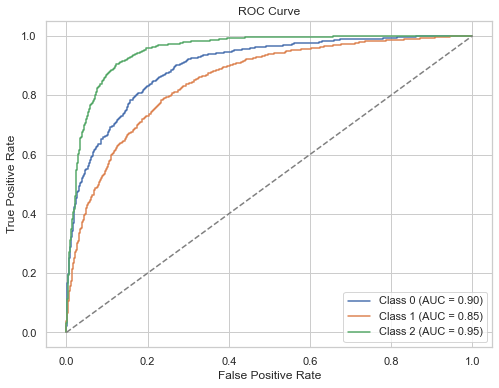

In [36]:
from sklearn.metrics import roc_curve, roc_auc_score

# Calculate probabilities for each class
probs = model.predict_proba(X_test)

# Get ROC curve and AUC score for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(3):  # Assuming 3 classes (Negative, Neutral, Positive)
    fpr[i], tpr[i], _ = roc_curve(y_test == i, probs[:, i])
    roc_auc[i] = roc_auc_score(y_test == i, probs[:, i])

# Plot ROC curve
plt.figure(figsize=(8, 6))
for i in range(3):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


## K-Nearest Neighbours

In [37]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline

# Optionally, you can use CountVectorizer for feature extraction
# vectorizer = CountVectorizer(tokenizer=lambda x: x, lowercase=False)

# Initialize KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=3, n_jobs=-1)

# Create a pipeline with KNN classifier
pipeline = Pipeline([
    ('vectorizer', tfidf_vectorizer), 
    ('knn', knn_classifier)
])

# Train the KNN classifier
pipeline.fit(X_train, y_train)


Pipeline(steps=[('vectorizer', TfidfVectorizer(max_features=10000)),
                ('knn', KNeighborsClassifier(n_jobs=-1, n_neighbors=3))])

In [38]:
# Make predictions on the test set
y_pred = pipeline.predict(X_test)

# Evaluate the model
from sklearn.metrics import accuracy_score, classification_report

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate a classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.70375
Classification Report:
              precision    recall  f1-score   support

           0       0.54      0.95      0.69       798
           1       0.92      0.47      0.62       819
           2       0.94      0.70      0.80       783

    accuracy                           0.70      2400
   macro avg       0.80      0.71      0.70      2400
weighted avg       0.80      0.70      0.70      2400



### Confusion Matrix 

A confusion matrix allows you to visualize the performance of classifier by showing the true positive, true negative, false positive, and false negative values

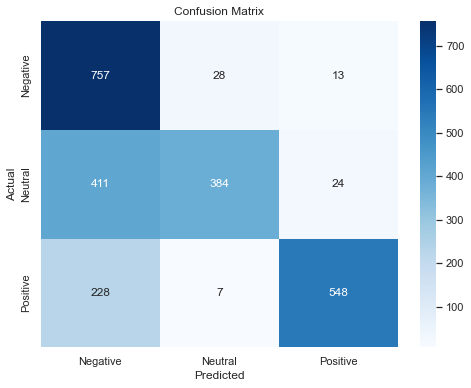

In [39]:
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


### Visualising Receiver Operating Characteristic (ROC) curve and the Area Under the Curve (AUC) score,

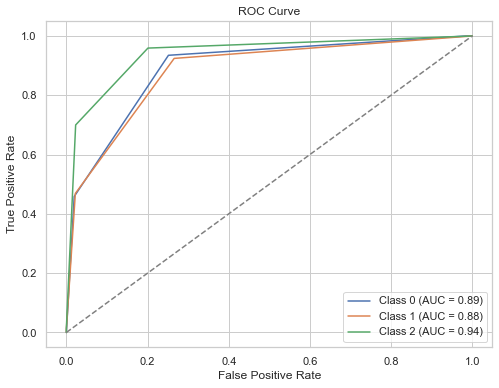

In [40]:
from sklearn.metrics import roc_curve, roc_auc_score

# Calculate probabilities for each class
probs = pipeline.predict_proba(X_test)

# Get ROC curve and AUC score for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(3):  # Assuming 3 classes (Negative, Neutral, Positive)
    fpr[i], tpr[i], _ = roc_curve(y_test == i, probs[:, i])
    roc_auc[i] = roc_auc_score(y_test == i, probs[:, i])

# Plot ROC curve
plt.figure(figsize=(8, 6))
for i in range(3):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


## Gradient Boosting Classifier

In [41]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report

# Initialize TfidfVectorizer with lowercase=True
tfidf_vectorizer = TfidfVectorizer(lowercase=True, max_features=10000)

# Initialize Gradient Boosting Classifier
GB_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, verbose=1, random_state=42)

# Create a pipeline with vectorizer and classifier
pipeline = Pipeline([
    ('vectorizer', tfidf_vectorizer),
    ('GB_classifier', GB_classifier)
])

# Train the model
pipeline.fit(X_train, y_train)

# Make predictions
predictions = pipeline.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy:.2f}')

# Generate classification report
print(classification_report(y_test, predictions))


      Iter       Train Loss   Remaining Time 
         1           1.0828            2.17m
         2           1.0693            2.13m
         3           1.0576            2.14m
         4           1.0471            2.15m
         5           1.0376            2.15m
         6           1.0287            2.14m
         7           1.0209            2.11m
         8           1.0128            2.09m
         9           1.0055            2.06m
        10           0.9984            2.03m
        20           0.9432            1.79m
        30           0.9024            1.56m
        40           0.8701            1.33m
        50           0.8432            1.12m
        60           0.8205           53.96s
        70           0.8005           40.46s
        80           0.7822           26.94s
        90           0.7649           13.46s
       100           0.7494            0.00s
Accuracy: 0.68
              precision    recall  f1-score   support

           0       0.65      

### Feature importance

When working with a Gradient Boosting Classifier, we can visualize important features based on their contribution to the model's predictions. One common method is to plot feature importance. 

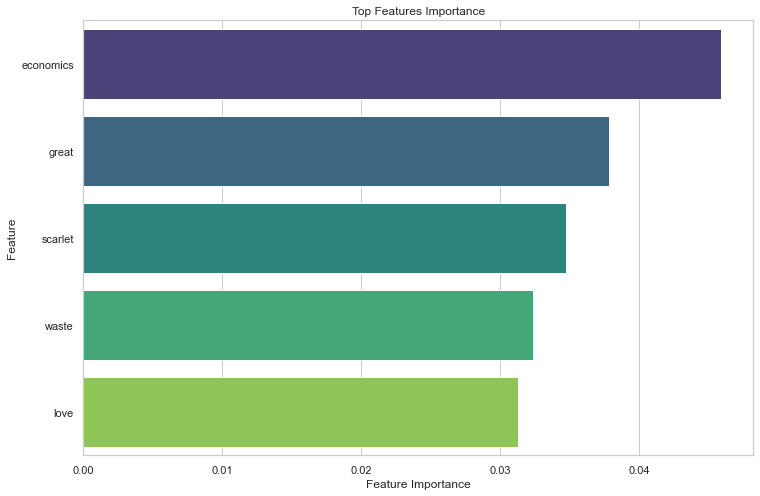

In [42]:
import seaborn as sns
# Get feature importances from the trained Gradient Boosting Classifier
feature_importances = GB_classifier.feature_importances_

# Get feature names from the TF-IDF vectorizer
feature_names = tfidf_vectorizer.get_feature_names_out()

# Create a DataFrame to hold feature names and their corresponding importances
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort the DataFrame by feature importances in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Select the top N features for visualization
top_features = importance_df.head(5)  # You can adjust the number of top features to display

# Plot the top N features and their importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=top_features, palette='viridis')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Top Features Importance')
plt.show()


### Confusion Matrix 

A confusion matrix allows you to visualize the performance of classifier by showing the true positive, true negative, false positive, and false negative values

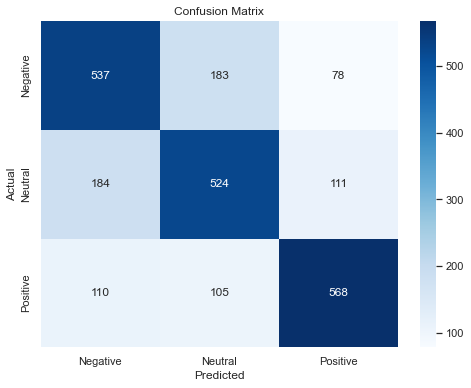

In [43]:
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


### Visualising Receiver Operating Characteristic (ROC) curve and the Area Under the Curve (AUC) score,

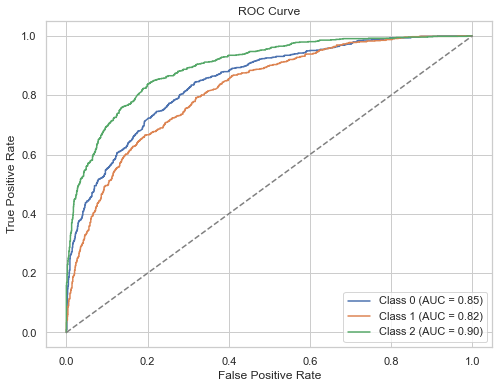

In [44]:
from sklearn.metrics import roc_curve, roc_auc_score

# Calculate probabilities for each class
probs = pipeline.predict_proba(X_test)

# Get ROC curve and AUC score for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(3):  # Assuming 3 classes (Negative, Neutral, Positive)
    fpr[i], tpr[i], _ = roc_curve(y_test == i, probs[:, i])
    roc_auc[i] = roc_auc_score(y_test == i, probs[:, i])

# Plot ROC curve
plt.figure(figsize=(8, 6))
for i in range(3):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


## Logistic Regression

In [45]:
from sklearn.linear_model import LogisticRegression

# Initialize Logistic Regression model
LR_classifier = LogisticRegression(random_state=42, n_jobs=-1, verbose=0)

pipeline = Pipeline([
    ('vectorizer', tfidf_vectorizer),  # Optional: Use CountVectorizer
    ('LR_classifier', LR_classifier)
])

# Train the model
pipeline.fit(X_train, y_train)

# Make predictions
predictions = pipeline.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy:.2f}')

# Generate classification report
print(classification_report(y_test, predictions))

Accuracy: 0.77
              precision    recall  f1-score   support

           0       0.76      0.74      0.75       798
           1       0.72      0.71      0.72       819
           2       0.82      0.85      0.83       783

    accuracy                           0.77      2400
   macro avg       0.77      0.77      0.77      2400
weighted avg       0.77      0.77      0.77      2400



### Confusion Matrix 

A confusion matrix allows you to visualize the performance of classifier by showing the true positive, true negative, false positive, and false negative values

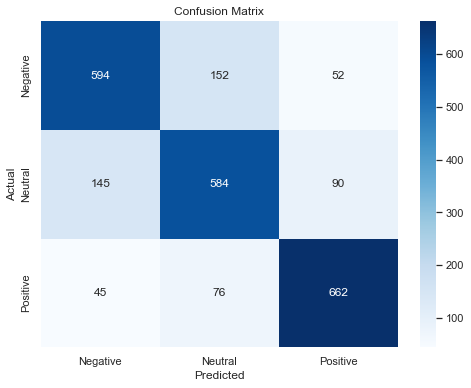

In [46]:
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


### Visualising Receiver Operating Characteristic (ROC) curve and the Area Under the Curve (AUC) score,

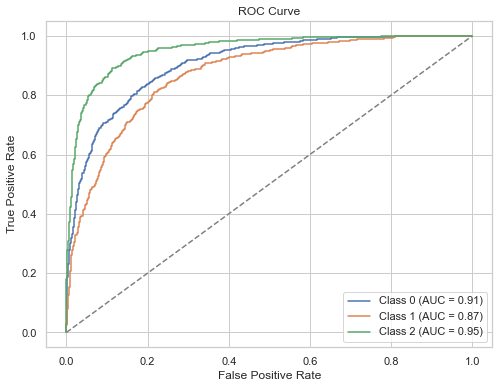

In [47]:
from sklearn.metrics import roc_curve, roc_auc_score

# Calculate probabilities for each class
probs = pipeline.predict_proba(X_test)

# Get ROC curve and AUC score for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(3):  # Assuming 3 classes (Negative, Neutral, Positive)
    fpr[i], tpr[i], _ = roc_curve(y_test == i, probs[:, i])
    roc_auc[i] = roc_auc_score(y_test == i, probs[:, i])

# Plot ROC curve
plt.figure(figsize=(8, 6))
for i in range(3):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


## Support Vector Machine

In [48]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Initialize SVM classifier
svm_classifier = SVC(kernel='linear', verbose=0)  # You can try different kernels like 'linear', 'rbf', etc.

# Transform the test data into TF-IDF vectors
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Train the SVM classifier using TF-IDF vectors
svm_classifier.fit(X_train_tfidf, y_train)  # Assuming tfidf_vectors represents the TF-IDF vectors of X_train

# Transform the test data into TF-IDF vectors
tfidf_vectors_test = tfidf_vectorizer.transform(X_test)

# Make predictions on the test set
y_pred = svm_classifier.predict(tfidf_vectors_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate classification report
print(classification_report(y_test, y_pred))

Accuracy: 0.7758333333333334
              precision    recall  f1-score   support

           0       0.75      0.75      0.75       798
           1       0.73      0.72      0.73       819
           2       0.85      0.86      0.85       783

    accuracy                           0.78      2400
   macro avg       0.78      0.78      0.78      2400
weighted avg       0.78      0.78      0.78      2400





### Confusion Matrix

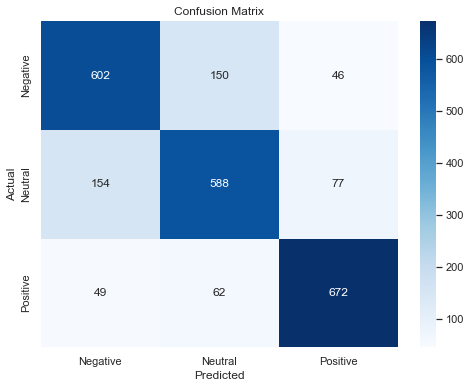

In [49]:
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


### Visualising Receiver Operating Characteristic (ROC) curve and the Area Under the Curve (AUC) score,

## Random Forest

In [50]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Initialize Random Forest classifier
random_forest_classifier = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1, verbose=1)

# Train the Random Forest classifier using TF-IDF vectors
random_forest_classifier.fit(X_train_tfidf, y_train)  # Assuming tfidf_vectors represents the TF-IDF vectors of X_train

# Make predictions on the test set
y_pred = random_forest_classifier.predict(tfidf_vectors_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate classification report
print(classification_report(y_test, y_pred))

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.4s


Accuracy: 0.81375
              precision    recall  f1-score   support

           0       0.80      0.82      0.81       798
           1       0.80      0.76      0.78       819
           2       0.85      0.86      0.86       783

    accuracy                           0.81      2400
   macro avg       0.81      0.81      0.81      2400
weighted avg       0.81      0.81      0.81      2400



[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    2.4s finished
[Parallel(n_jobs=20)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=20)]: Done 100 out of 100 | elapsed:    0.0s finished




### Confusion Matrix

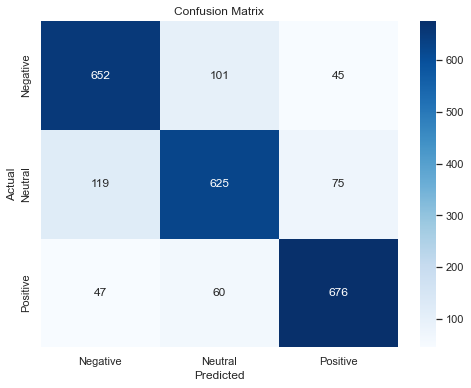

In [51]:
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


## Hyperparameter Tuning for Random Forest Classifier

In [52]:
from sklearn.model_selection import RandomizedSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}
randomized_search = RandomizedSearchCV(estimator=random_forest_classifier, param_distributions=param_grid, n_jobs=-1, verbose=2, cv=5)
randomized_search.fit(X_train_tfidf, y_train)
best_params = randomized_search.best_params_
print("Best Hyperparameters:", best_params)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 160 tasks      | elapsed:    4.5s


Best Hyperparameters: {'n_estimators': 200, 'min_samples_split': 2, 'max_depth': None}


[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    5.5s finished


## Random Forest with best Hyperparameters

In [53]:
# Initialize Random Forest classifier with best Hyperparameters: {'n_estimators': 300, 'min_samples_split': 2, 'max_depth': None}
random_forest_classifier = RandomForestClassifier(n_estimators=300, random_state=42, min_samples_split=2, max_depth=None, n_jobs=-1, verbose=1)

# Train the Random Forest classifier using TF-IDF vectors
random_forest_classifier.fit(X_train_tfidf, y_train)  # Assuming tfidf_vectors represents the TF-IDF vectors of X_train

import joblib
# Save the hyperparameter-tuned Random Forest model
joblib.dump(random_forest_classifier, "random_forest_classifier_tuned.pkl")
# Save the TF-IDF vectorizer
joblib.dump(tfidf_vectorizer, "tfidf_vectorizer.pkl")

# Make predictions on the test set
y_pred = random_forest_classifier.predict(tfidf_vectors_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate classification report
print(classification_report(y_test, y_pred))

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 160 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    8.4s finished


Accuracy: 0.82875
              precision    recall  f1-score   support

           0       0.82      0.83      0.83       798
           1       0.82      0.78      0.80       819
           2       0.85      0.87      0.86       783

    accuracy                           0.83      2400
   macro avg       0.83      0.83      0.83      2400
weighted avg       0.83      0.83      0.83      2400



[Parallel(n_jobs=20)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=20)]: Done 160 tasks      | elapsed:    0.0s
[Parallel(n_jobs=20)]: Done 300 out of 300 | elapsed:    0.0s finished


In [54]:
import sklearn
print(sklearn.__version__)

1.3.2


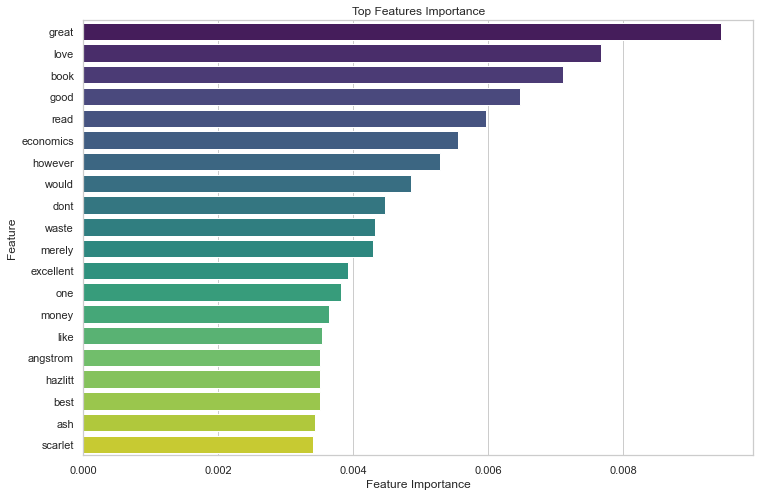

In [55]:
# Get feature importances from the trained Random Forest classifier
feature_importances = random_forest_classifier.feature_importances_

# Get feature names from the TF-IDF vectorizer
feature_names = tfidf_vectorizer.get_feature_names_out()

# Create a DataFrame to hold feature names and their corresponding importances
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort the DataFrame by feature importances in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Select the top N features for visualization
top_features = importance_df.head(20)  # You can adjust the number of top features to display

# Plot the top N features and their importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=top_features, palette='viridis')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Top Features Importance')
plt.show()




### Confusion Matrix

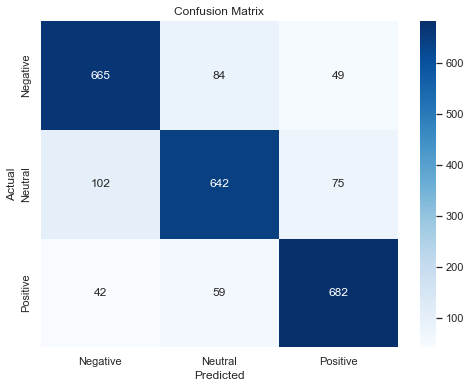

In [56]:
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


## Hyperparameter Tuning for Naive Bayes

In [57]:
# Define the pipeline with TF-IDF vectorizer and Naive Bayes classifier
naive_bayes_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),  # Convert text to numerical features using TF-IDF
    ('classifier', MultinomialNB())  # Naive Bayes classifier
])

# Define the hyperparameters and their possible values to search
param_grid = {
    'tfidf__max_df': [0.5, 0.75, 1.0],  # Ignore terms that have a document frequency strictly higher than the given threshold
    'tfidf__min_df': [1, 2, 3],  # Ignore terms that have a document frequency strictly lower than the given threshold
    'classifier__alpha': [0.1, 0.5, 1.0]  # Additive (Laplace/Lidstone) smoothing parameter
}

# Initialize RandomizedSearchCV with the pipeline, hyperparameters, and cross-validation
randomized_search = RandomizedSearchCV(naive_bayes_pipeline, param_distributions=param_grid, cv=5, n_jobs=-1, verbose=2)

# Perform Randomized Search to find the best parameters
randomized_search.fit(X_train, y_train)

# Print the best hyperparameters found by Randomized Search
print("Best Hyperparameters:", randomized_search.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Hyperparameters: {'tfidf__min_df': 1, 'tfidf__max_df': 0.75, 'classifier__alpha': 0.1}


## Naive Bayes with best Hyperparameters

In [58]:
# Use the best model for predictions
best_naive_bayes_model = randomized_search.best_estimator_

# Predictions on the test data
predictions = best_naive_bayes_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy:.2f}')

# Generate a detailed classification report
print(classification_report(y_test, predictions))

Accuracy: 0.85
              precision    recall  f1-score   support

           0       0.84      0.84      0.84       798
           1       0.83      0.81      0.82       819
           2       0.88      0.90      0.89       783

    accuracy                           0.85      2400
   macro avg       0.85      0.85      0.85      2400
weighted avg       0.85      0.85      0.85      2400





### Confusion Matrix

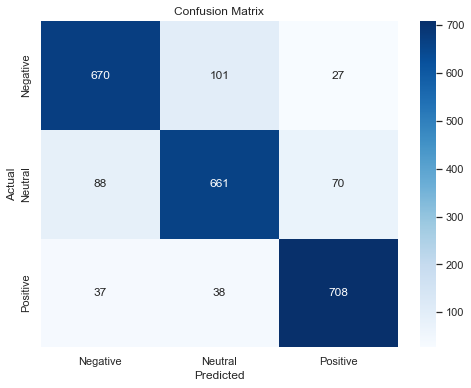

In [59]:
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


## Hyperparameter Tuning for K-Nearest Neighbours

In [60]:

pipeline = Pipeline([
    ('vectorizer', tfidf_vectorizer),  # Optional: Use CountVectorizer
    ('knn', knn_classifier)
])

# Define the hyperparameters and their possible values
param_grid = {
    'vectorizer__ngram_range': [(1, 1), (1, 2), (1, 3)],  # Example n-gram ranges
    'knn__weights': ['uniform', 'distance'],  # Weight function used in prediction
}

# Create Randomized Search object
randomized_search = RandomizedSearchCV(estimator=pipeline, param_distributions=param_grid, cv=5, n_jobs=-1)

# Perform Randomized Search on the training data
randomized_search.fit(X_train, y_train)

# Print the best hyperparameters found by Randomized Search
print("Best Hyperparameters:", randomized_search.best_params_)

C:\Users\slaks\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:307: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best Hyperparameters: {'vectorizer__ngram_range': (1, 1), 'knn__weights': 'distance'}



## K-Nearest Neighbours with best Hyperparameters

In [61]:
# Use the best model for predictions
best_knn_model = randomized_search.best_estimator_

# Make predictions on the test set
y_pred = best_knn_model.predict(X_test)

# Evaluate the model
from sklearn.metrics import accuracy_score, classification_report

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate a classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.76125
Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.95      0.74       798
           1       0.93      0.56      0.70       819
           2       0.94      0.78      0.85       783

    accuracy                           0.76      2400
   macro avg       0.82      0.76      0.76      2400
weighted avg       0.82      0.76      0.76      2400





### Confusion Matrix

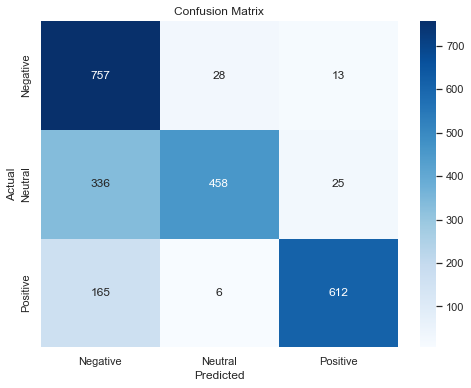

In [62]:
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


### Visualising Receiver Operating Characteristic (ROC) curve and the Area Under the Curve (AUC) score,

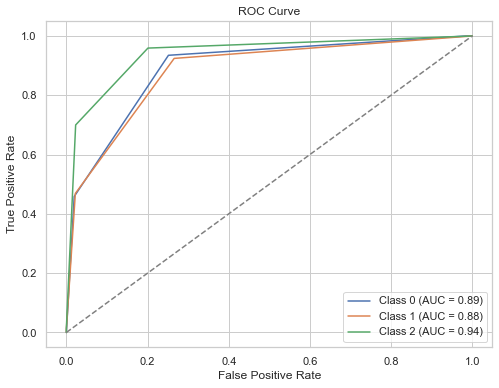

In [63]:
from sklearn.metrics import roc_curve, roc_auc_score

# Calculate probabilities for each class
probs = pipeline.predict_proba(X_test)

# Get ROC curve and AUC score for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(3):  # Assuming 3 classes (Negative, Neutral, Positive)
    fpr[i], tpr[i], _ = roc_curve(y_test == i, probs[:, i])
    roc_auc[i] = roc_auc_score(y_test == i, probs[:, i])

# Plot ROC curve
plt.figure(figsize=(8, 6))
for i in range(3):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


## Hyperparameter Tuning for Gradient Boosting Classifier

In [64]:
# Create a pipeline with TfidfVectorizer and Gradient Boosting Classifier
pipeline = Pipeline([
    ('vectorizer', tfidf_vectorizer),  # Convert text to numerical features using TF-IDF
    ('GB_classifier', GB_classifier)
])

# Define the hyperparameters and their possible values
param_grid = {
    'vectorizer__ngram_range': [(1, 1), (1, 2), (1, 3)],  # Example n-gram ranges
    'GB_classifier__n_estimators': [50, 100, 200],  # Number of boosting stages to be run
    'GB_classifier__learning_rate': [0.05, 0.1, 0.2],  # Step size shrinkage used to prevent overfitting
    'GB_classifier__max_depth': [3, 4, 5]  # Maximum depth of the individual estimators
}

# Create Randomized Search object
randomized_search = RandomizedSearchCV(estimator=pipeline, param_distributions=param_grid, cv=5, n_jobs=-1, verbose=2)

# Perform Randomized Search on the training data
randomized_search.fit(X_train, y_train)

# Print the best hyperparameters found by Randomized Search
print("Best Hyperparameters:", randomized_search.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
      Iter       Train Loss   Remaining Time 
         1           1.0521            8.36m
         2           1.0178            8.30m
         3           0.9897            8.20m
         4           0.9654            8.12m
         5           0.9451            8.06m
         6           0.9247            8.03m
         7           0.9067            7.99m
         8           0.8903            8.00m
         9           0.8749            7.94m
        10           0.8620            7.87m
        20           0.7618            7.34m
        30           0.6956            6.86m
        40           0.6420            6.40m
        50           0.5987            5.99m
        60           0.5644            5.57m
        70           0.5338            5.16m
        80           0.5108            4.74m
        90           0.4863            4.36m
       100           0.4673            3.95m
       200           0.3291           

## Gradient Boosting Classifier with best Hyperparameters

In [65]:
# Use the best model for predictions
best_GB_model = randomized_search.best_estimator_

# Make predictions on the test set
predictions = best_GB_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

# Generate a classification report
print("Classification Report:")
print(classification_report(y_test, predictions))

Accuracy: 0.77125
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.77      0.77       798
           1       0.73      0.72      0.73       819
           2       0.81      0.82      0.82       783

    accuracy                           0.77      2400
   macro avg       0.77      0.77      0.77      2400
weighted avg       0.77      0.77      0.77      2400





### Confusion Matrix

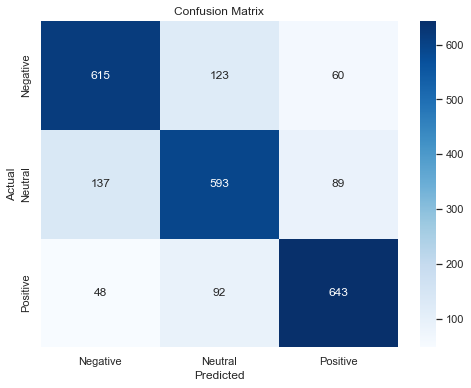

In [66]:
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


### Visualising Receiver Operating Characteristic (ROC) curve and the Area Under the Curve (AUC) score,

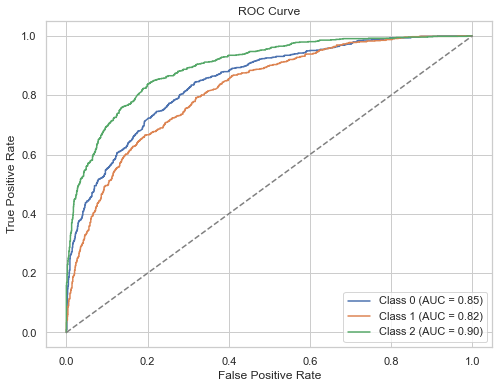

In [67]:
from sklearn.metrics import roc_curve, roc_auc_score

# Calculate probabilities for each class
probs = pipeline.predict_proba(X_test)

# Get ROC curve and AUC score for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(3):  # Assuming 3 classes (Negative, Neutral, Positive)
    fpr[i], tpr[i], _ = roc_curve(y_test == i, probs[:, i])
    roc_auc[i] = roc_auc_score(y_test == i, probs[:, i])

# Plot ROC curve
plt.figure(figsize=(8, 6))
for i in range(3):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


## Hyperparameter Tuning for Logistic Regression

In [68]:
# Create a pipeline with TfidfVectorizer and Logistic Regression classifier
pipeline = Pipeline([
    ('vectorizer', tfidf_vectorizer),  # Convert text to numerical features using TF-IDF
    ('LR_classifier', LR_classifier)
])

# Define the hyperparameters and their possible values
param_grid = {
    'vectorizer__ngram_range': [(1, 1), (1, 2), (1, 3)],  # Example n-gram ranges
    'LR_classifier__C': [0.1, 1, 10],  # Regularization parameter
    'LR_classifier__penalty': ['l2']  # Type of regularization penalty (only 'l2' is allowed for lbfgs solver)
}

# Create Randomized Search object
randomized_search = RandomizedSearchCV(estimator=pipeline, param_distributions=param_grid, cv=5, n_jobs=-1)

# Perform Randomized Search on the training data
randomized_search.fit(X_train, y_train)

# Print the best hyperparameters found by Randomized Search
print("Best Hyperparameters:", randomized_search.best_params_)

C:\Users\slaks\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:307: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best Hyperparameters: {'vectorizer__ngram_range': (1, 1), 'LR_classifier__penalty': 'l2', 'LR_classifier__C': 10}


## Logistic Regression with best Hyperparameters

In [69]:
# Use the best model for predictions
best_LR_model = randomized_search.best_estimator_

# Make predictions on the test set
predictions = best_LR_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

# Generate a classification report
print("Classification Report:")
print(classification_report(y_test, predictions))

Accuracy: 0.8045833333333333
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.78      0.79       798
           1       0.76      0.76      0.76       819
           2       0.86      0.88      0.87       783

    accuracy                           0.80      2400
   macro avg       0.80      0.81      0.81      2400
weighted avg       0.80      0.80      0.80      2400





### Confusion Matrix

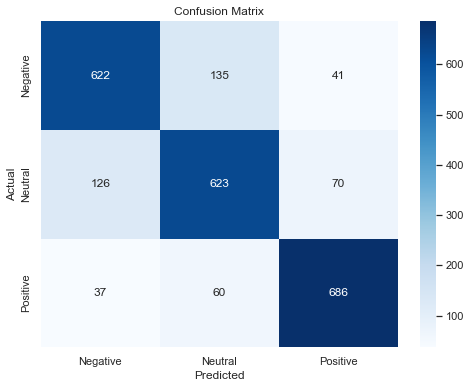

In [70]:
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


### Visualising Receiver Operating Characteristic (ROC) curve and the Area Under the Curve (AUC) score,

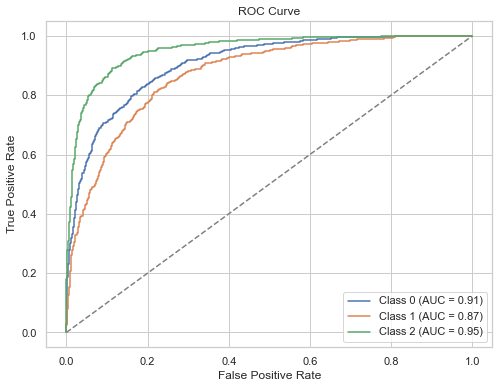

In [71]:
from sklearn.metrics import roc_curve, roc_auc_score

# Calculate probabilities for each class
probs = pipeline.predict_proba(X_test)

# Get ROC curve and AUC score for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(3):  # Assuming 3 classes (Negative, Neutral, Positive)
    fpr[i], tpr[i], _ = roc_curve(y_test == i, probs[:, i])
    roc_auc[i] = roc_auc_score(y_test == i, probs[:, i])

# Plot ROC curve
plt.figure(figsize=(8, 6))
for i in range(3):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


## Hyperparameter Tuning for Support Vector Machine

In [72]:
# Define the hyperparameters and their possible values
param_dist = {
    'kernel': ['linear', 'rbf', 'poly'],  # Kernels to be searched
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'gamma': [0.1, 1, 10],  # Kernel coefficient for 'rbf' and 'poly'
}

# Create Randomized Search object
randomized_search = RandomizedSearchCV(estimator=svm_classifier, param_distributions=param_dist, cv=5, n_iter=10, n_jobs=-1)

# Perform Randomized Search on the training data
randomized_search.fit(X_train_tfidf, y_train)

# Print the best hyperparameters found by Randomized Search
print("Best Hyperparameters:", randomized_search.best_params_)

Best Hyperparameters: {'kernel': 'rbf', 'gamma': 1, 'C': 10}


## Support Vector Machine with best Hyperparameters

In [73]:
# Use the best model for predictions
best_svm_model = randomized_search.best_estimator_

# Clean the test data: Ensure all elements are strings
X_test_cleaned = list(map(lambda x: str(x), X_test))

# Transform the cleaned test data into TF-IDF vectors
tfidf_vectors_test = tfidf_vectorizer.transform(X_test_cleaned)

# Make predictions on the test set
predictions = best_svm_model.predict(tfidf_vectors_test)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, predictions))


Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.86      0.85       798
           1       0.84      0.83      0.84       819
           2       0.91      0.91      0.91       783

    accuracy                           0.87      2400
   macro avg       0.87      0.87      0.87      2400
weighted avg       0.87      0.87      0.87      2400





### Confusion Matrix

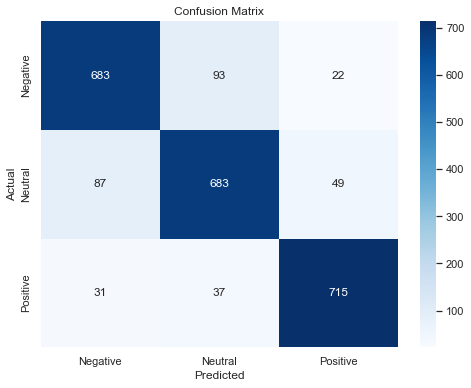

In [74]:
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


## Ensemble Methods: Random Forest with Bagging

In [75]:
from sklearn.ensemble import BaggingClassifier

bagging_classifier = BaggingClassifier(base_estimator=random_forest_classifier, n_estimators=50, n_jobs=-1, verbose=2, random_state=42)
bagging_classifier.fit(X_train_tfidf, y_train)

C:\Users\slaks\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
[Parallel(n_jobs=20)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done   3 out of  20 | elapsed:  4.2min remaining: 23.6min
[Parallel(n_jobs=20)]: Done  14 out of  20 | elapsed:  4.5min remaining:  1.9min
[Parallel(n_jobs=20)]: Done  20 out of  20 | elapsed:  4.7min finished


BaggingClassifier(base_estimator=RandomForestClassifier(n_estimators=300,
                                                        n_jobs=-1,
                                                        random_state=42,
                                                        verbose=1),
                  n_estimators=50, n_jobs=-1, random_state=42, verbose=2)

## Advanced Feature Engineering Techniques

### 1. N-grams with TfidfVectorizer:

In [76]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split


# Initialize TfidfVectorizer with unigrams and bigrams
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 2), max_features=10000)  # You can adjust max_features based on your dataset size

# Fit and transform the training data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Initialize Random Forest classifier
random_forest_classifier = RandomForestClassifier(n_estimators=100, n_jobs=-1, verbose=1, random_state=42)

# Train the classifier
random_forest_classifier.fit(X_train_tfidf, y_train)

# Make predictions on the test data
y_pred = random_forest_classifier.predict(X_test_tfidf)

# Calculate accuracy and print the results
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Print classification report for detailed evaluation
print("Classification Report:")
print(classification_report(y_test, y_pred))

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.6s


Accuracy: 0.79
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.78      0.77       798
           1       0.77      0.74      0.75       819
           2       0.83      0.85      0.84       783

    accuracy                           0.79      2400
   macro avg       0.79      0.79      0.79      2400
weighted avg       0.79      0.79      0.79      2400



[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    3.0s finished
[Parallel(n_jobs=20)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=20)]: Done 100 out of 100 | elapsed:    0.0s finished




### Confusion Matrix

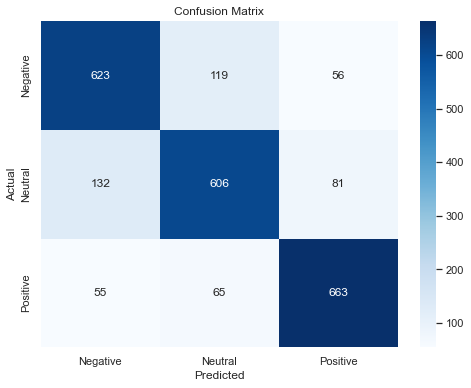

In [77]:
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


# Recommendation with Pearson Correlation

In [78]:
!pip install plotly

In [80]:
import numpy as np 
import pandas as pd 
import plotly.express as px
import plotly.graph_objects as go
from math import sqrt

book_data = pd.read_csv("books_data.csv", delimiter=',', on_bad_lines='skip')
book_data = book_data[['Title', 'authors', 'categories']] # keep the Title, authors and categories from the columns
book_data.head()

,Title,authors,categories
0,Its Only Art If Its Well Hung!,['Julie Strain'],['Comics & Graphic Novels']
1,Dr. Seuss: American Icon,['Philip Nel'],['Biography & Autobiography']
2,Wonderful Worship in Smaller Churches,['David R. Ray'],['Religion']
3,Whispers of the Wicked Saints,['Veronica Haddon'],['Fiction']
4,"Nation Dance: Religion, Identity and Cultural ...",['Edward Long'],NaN


In [82]:
# Read the ratings data from Books_rating.csv and save them to ratings_data (pandas dataframe)
ratings_data = pd.read_csv('Books_rating.csv', delimiter=',', on_bad_lines='skip')
ratings_data = ratings_data[['User_id', 'Title', 'review/score']] # Select specific columns
ratings_data.head()

,User_id,Title,review/score
0,AVCGYZL8FQQTD,Its Only Art If Its Well Hung!,4.0
1,A30TK6U7DNS82R,Dr. Seuss: American Icon,5.0
2,A3UH4UZ4RSVO82,Dr. Seuss: American Icon,5.0
3,A2MVUWT453QH61,Dr. Seuss: American Icon,4.0
4,A22X4XUPKF66MR,Dr. Seuss: American Icon,4.0


## Books with most ratings

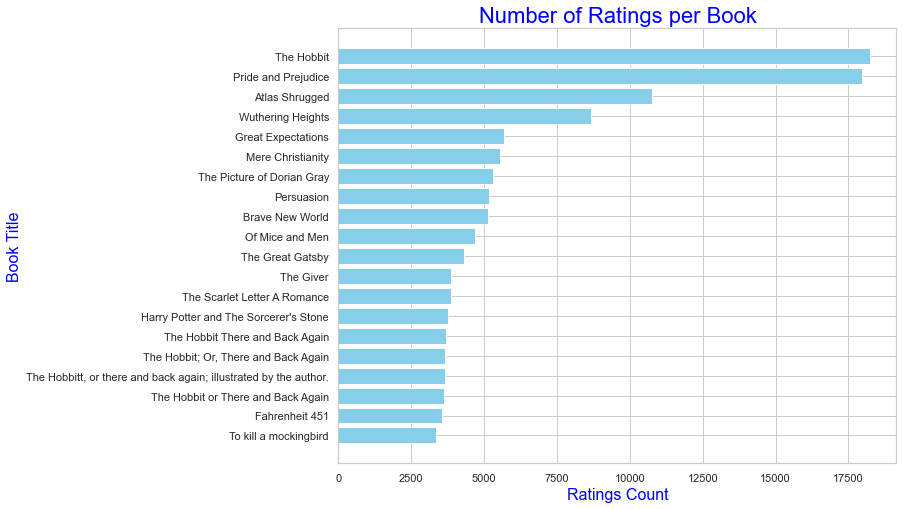

In [83]:
import matplotlib.pyplot as plt

# Calculate the number of user ratings per book and sort by ascending order
ratings_per_book = ratings_data.groupby('Title')['User_id'].count().sort_values()

# Select the last (top) 20 book titles and their user counts
top_books = ratings_per_book.tail(20)

# Create a vertical bar chart
plt.figure(figsize=(10, 8))
plt.barh(top_books.index, top_books.values, color='skyblue')

# Set the title and axis labels
plt.title('Number of Ratings per Book', fontsize=22, color='blue')
plt.xlabel('Ratings Count', fontsize=16, color='blue')
plt.ylabel('Book Title', fontsize=16, color='blue')

# Show the bar chart
plt.show()

## Books with highest average rating

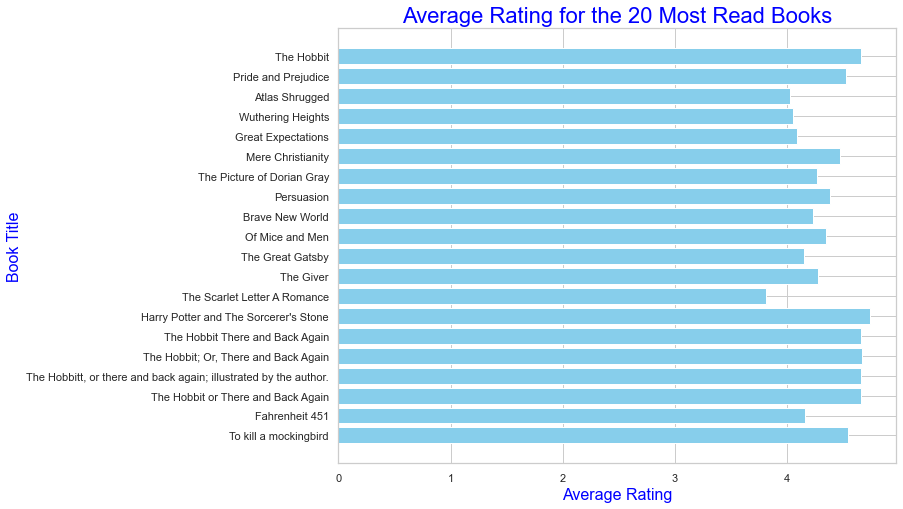

In [84]:
import matplotlib.pyplot as plt

# Group the ratings data by book title and calculate the average review score
average_ratings = ratings_data.groupby('Title')['review/score'].mean()

# Get the column names
df = average_ratings.to_frame()
df["num_ratings"] = ratings_per_book

# Sort the books based on the number of ratings in descending order
sorted_books = df.sort_values(by=['num_ratings'], ascending=False)

# Subset the average ratings DataFrame for the top 20 books
average_ratings_top_20 = average_ratings.loc[ratings_per_book.index[-20:]]

# Create a horizontal bar chart for the average ratings
plt.figure(figsize=(10, 8))
plt.barh(average_ratings_top_20.index, average_ratings_top_20.values, color='skyblue')

# Set the title and axis labels
plt.title('Average Rating for the 20 Most Read Books', fontsize=22, color='blue')
plt.xlabel('Average Rating', fontsize=16, color='blue')
plt.ylabel('Book Title', fontsize=16, color='blue')

# Show the bar chart
plt.show()


## Books with the highest number of ratings

In [85]:
# Display the books with the highest number of ratings
print(sorted_books.head(20))

                                                    review/score  num_ratings
Title                                                                        
The Hobbit                                              4.657131        18237
Pride and Prejudice                                     4.527662        17969
Atlas Shrugged                                          4.028690        10762
Wuthering Heights                                       4.053711         8660
Great Expectations                                      4.089880         5675
Mere Christianity                                       4.469684         5527
The Picture of Dorian Gray                              4.272140         5316
Persuasion                                              4.386686         5160
Brave New World                                         4.235266         5136
Of Mice and Men                                         4.350476         4678
The Great Gatsby                                        4.151200

## Books with the highest rating

In [86]:
# Sort the books based on the average rating in descending order
sorted_books = df.sort_values(by=['review/score'], ascending=False)
print(sorted_books.head(20))

                                                    review/score  num_ratings
Title                                                                        
The Christian year ;: Thoughts in verse for the...           5.0            1
The Book of Rugs                                             5.0            1
The Book of Presidents by Orville V. Webster (1...           5.0            1
The Book of Psalms                                           5.0            6
The Book of Psalms: A Selection of Fifty                     5.0            6
Outlaws and Gunfighters of the Old West (Audioc...           5.0            0
Outlaws and Gunfighters of the Old West                      5.0            0
Essentials for the Activity Professional in Lon...           5.0            2
Legacy: A family history and genealogical recor...           5.0            1
The Book of Regional American Cooking: Southwest             5.0            2
The Book of Reuben                                           5.0

## Books with the highest rating and number of ratings

In [87]:
# Sort the books based on the average rating and number of ratings in descending order
sorted_books = df.sort_values(by=['review/score', 'num_ratings'], ascending=False)
print(sorted_books.head(20))

                                                    review/score  num_ratings
Title                                                                        
Lilla Belle: The First Stages                                5.0          106
The Road to Guadalupe: A Modern Pilgrimage to t...           5.0           44
Angel Unaware: A Touching Story of Love and Loss             5.0           38
Christ's Object Lessons                                      5.0           38
Hints on child-training                                      5.0           36
Hints on child-training,                                     5.0           36
Magruder's American government                               5.0           36
The Hebrew Kid and the Apache Maiden                         5.0           33
The ice people                                               5.0           33
The song of Hiawatha                                         5.0           33
A Reason To Live : The True Story of One Woman'...           5.0

## Authors with the most books

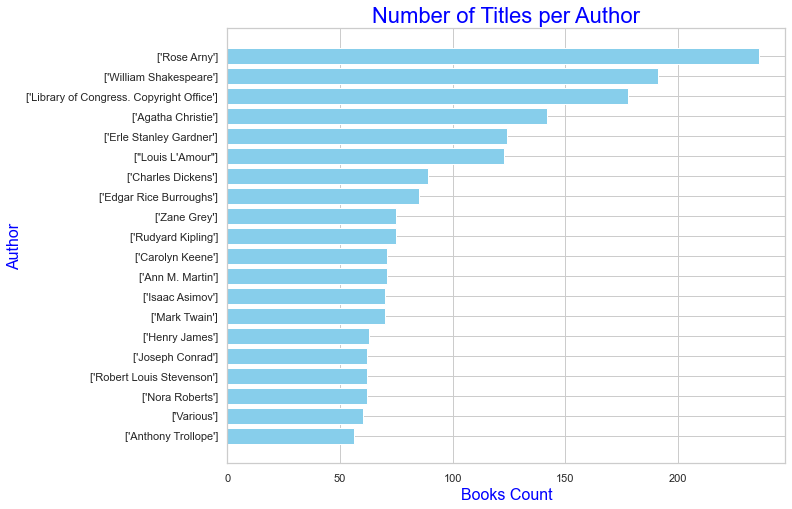

In [88]:
import matplotlib.pyplot as plt

# Calculate the number of Titles per author and sort by ascending order
categories_stats = book_data.groupby('authors')['Title'].count().sort_values()

# Create a horizontal bar chart with the last(top) 20 authors and their Title counts
plt.figure(figsize=(10, 8))
plt.barh(categories_stats.index[-20:], categories_stats.values[-20:], color='skyblue')

# Set the title and axis labels
plt.title('Number of Titles per Author', fontsize=22, color='blue')
plt.xlabel('Books Count', fontsize=16, color='blue')
plt.ylabel('Author', fontsize=16, color='blue')

# Show the bar chart
plt.show()


## Categories with the most titles

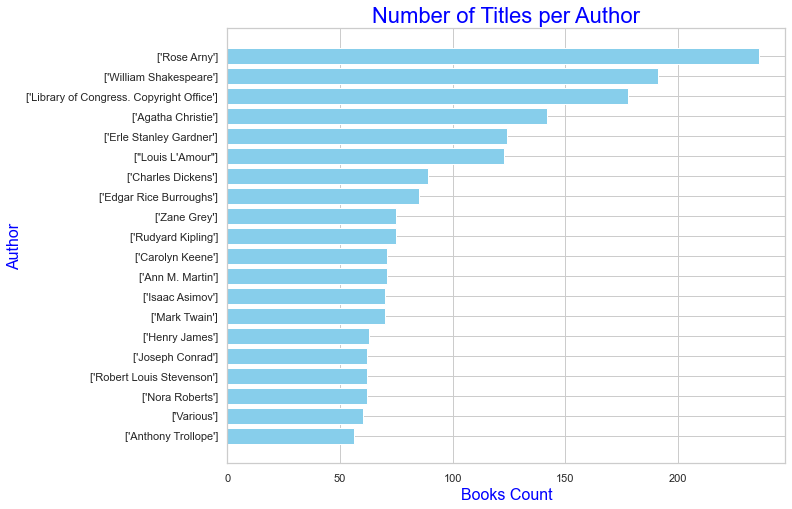

In [89]:
import matplotlib.pyplot as plt

# Calculate the number of Titles per author and sort by ascending order
categories_stats = book_data.groupby('authors')['Title'].count().sort_values()

# Create a horizontal bar chart with the last(top) 20 authors and their Title counts
plt.figure(figsize=(10, 8))
plt.barh(categories_stats.index[-20:], categories_stats.values[-20:], color='skyblue')

# Set the title and axis labels
plt.title('Number of Titles per Author', fontsize=22, color='blue')
plt.xlabel('Books Count', fontsize=16, color='blue')
plt.ylabel('Author', fontsize=16, color='blue')

# Show the bar chart
plt.show()


## Distribution of the ratings

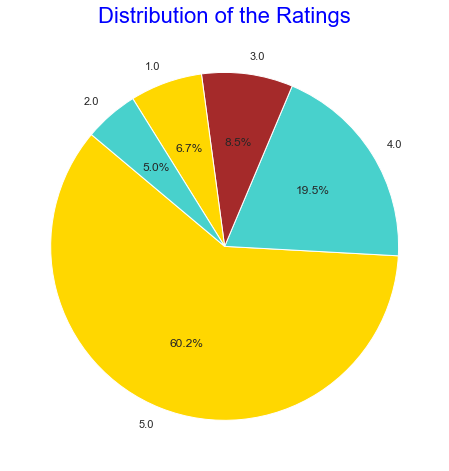

In [90]:
import matplotlib.pyplot as plt

# Calculate values for the pie chart
labels = ratings_data['review/score'].value_counts().keys().map(str)
values = ratings_data['review/score'].value_counts() / ratings_data['review/score'].value_counts().shape[0]

# Define colors for the pie chart
colors = ['gold', 'mediumturquoise', 'brown']

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(values, labels=labels, autopct='%1.1f%%', colors=colors, startangle=140)
plt.title('Distribution of the Ratings', fontsize=22, color='blue')

# Show the pie chart
plt.show()


## PEARSON CORRELATION

In [91]:
#Define user input with book titles and review scores
userInput = [
    {'Title': 'The Hobbit', 'review/score': 5},
    {'Title': 'The Great Gatsby', 'review/score': 5},
    {'Title': 'Pride and Prejudice', 'review/score': 4},
    {'Title': 'Harry Potter and The Sorcerer\'s Stone', 'review/score': 4},
    {'Title': 'Fahrenheit 451', 'review/score': 5}
]
inputBooks = pd.DataFrame(userInput)
print(inputBooks)

# Filtering out users that have rated books that the input user has read and storing it
userSubset = ratings_data[ratings_data['Title'].isin(inputBooks['Title'].tolist())]
userSubset.head()

                                   Title  review/score
0                             The Hobbit             5
1                       The Great Gatsby             5
2                    Pride and Prejudice             4
3  Harry Potter and The Sorcerer's Stone             4
4                         Fahrenheit 451             5


,User_id,Title,review/score
16803,NaN,Fahrenheit 451,2.0
16804,A1SSUBUKHSC2G0,Fahrenheit 451,5.0
16805,NaN,Fahrenheit 451,5.0
16806,AF00Y6733IOGB,Fahrenheit 451,5.0
16807,NaN,Fahrenheit 451,5.0


In [92]:
# Groupby creates several sub dataframes where they all have the same value in the column specified as the parameter
userSubsetGroup = userSubset.groupby(['User_id'])
userSubsetGroup.head()

# Sort the user groups by the number of common books
userSubsetGroup = sorted(userSubsetGroup, key=lambda x: len(x[1]), reverse=True)
print(userSubsetGroup[0:3])

[('A1D2C0WDCSHUWZ',                 User_id                Title  review/score
399081   A1D2C0WDCSHUWZ  Pride and Prejudice           5.0
399082   A1D2C0WDCSHUWZ  Pride and Prejudice           5.0
399128   A1D2C0WDCSHUWZ  Pride and Prejudice           5.0
399162   A1D2C0WDCSHUWZ  Pride and Prejudice           5.0
399186   A1D2C0WDCSHUWZ  Pride and Prejudice           5.0
...                 ...                  ...           ...
2943553  A1D2C0WDCSHUWZ           The Hobbit           5.0
2943617  A1D2C0WDCSHUWZ           The Hobbit           5.0
2943823  A1D2C0WDCSHUWZ           The Hobbit           5.0
2943946  A1D2C0WDCSHUWZ           The Hobbit           5.0
2943986  A1D2C0WDCSHUWZ           The Hobbit           5.0

[234 rows x 3 columns]), ('AKPO09J3E3UQV',                User_id                Title  review/score
399361   AKPO09J3E3UQV  Pride and Prejudice           5.0
399362   AKPO09J3E3UQV  Pride and Prejudice           5.0
399363   AKPO09J3E3UQV  Pride and Prejudice           

In [93]:
# Store the Pearson Correlation in a dictionary, where the key is the user Id and the value is the coefficient
pearsonCorrelationDict = {}
# For every user group in our subset
for name, group in userSubsetGroup:
    # Let’s start by sorting the input and current user group so the values aren’t mixed up later on
    group = group.sort_values(by='Title')
    inputBooks = inputBooks.sort_values(by='Title')
    # Get the N for the formula
    nRatings = len(group)
    # Get the review scores for the movies that they both have in common
    temp_df = inputBooks[inputBooks['Title'].isin(group['Title'].tolist())]
    # And then store them in a temporary buffer variable in a list format to facilitate future calculations
    tempRatingList = temp_df['review/score'].tolist()
    # Let’s also put the current user group reviews in a list format
    tempGroupList = group['review/score'].tolist()
    # Now let’s calculate the pearson correlation between two users, so called, x and y
    Sxx = sum([i ** 2 for i in tempRatingList]) - pow(sum(tempRatingList), 2) / float(nRatings)
    Syy = sum([i ** 2 for i in tempGroupList]) - pow(sum(tempGroupList), 2) / float(nRatings)
    Sxy = sum(i * j for i, j in zip(tempRatingList, tempGroupList)) - sum(tempRatingList) * sum(tempGroupList) / float(
        nRatings)
    # If the denominator is different than zero, then divide, else, 0 correlation.
    if Sxx != 0 and Syy != 0:
        pearsonCorrelationDict[name] = Sxy / sqrt(Sxx * Syy)
    else:
        pearsonCorrelationDict[name] = 0

pearsonDF = pd.DataFrame.from_dict(pearsonCorrelationDict, orient='index')
pearsonDF.columns = ['similarityIndex']
pearsonDF['User_id'] = pearsonDF.index
pearsonDF.index = range(len(pearsonDF))
pearsonDF.head()

,similarityIndex,User_id
0,-0.526923,A1D2C0WDCSHUWZ
1,0.000000,AKPO09J3E3UQV
2,0.000000,A20EEWWSFMZ1PN
3,-0.804663,A3OH101U0CPUC7
4,0.060098,A1LMBM1N4EXS5W


In [94]:
# Select the top 50 users with the highest similarity index
topUsers = pearsonDF.sort_values(by='similarityIndex', ascending=False)[0:50]
topUsers.head()

,similarityIndex,User_id
4695,1.000000,AHHU34NT0HTR1
7743,1.000000,ANVOBPDLWD25K
35,0.993933,AFYYHRPSFBLWS
1112,0.992790,A3C0380R9NMLHD
2269,0.990867,AVHBK2SJ6CJ1C


In [95]:
# Merge the top users with the ratings data
topUsersRating = topUsers.merge(ratings_data, left_on='User_id', right_on='User_id', how='inner')
topUsersRating.head()

,similarityIndex,User_id,Title,review/score
0,1.0,AHHU34NT0HTR1,Fahrenheit 451,5.0
1,1.0,AHHU34NT0HTR1,The Other Boleyn Girl,4.0
2,1.0,AHHU34NT0HTR1,The Great Gatsby,3.0
3,1.0,AHHU34NT0HTR1,Great Gatsby (Everyman),3.0
4,1.0,AHHU34NT0HTR1,Fahrenheit 451,5.0


In [96]:
# Multiplies the similarity by the user’s ratings
topUsersRating['weightedRating'] = topUsersRating['similarityIndex'] * topUsersRating['review/score']
topUsersRating.head()

,similarityIndex,User_id,Title,review/score,weightedRating
0,1.0,AHHU34NT0HTR1,Fahrenheit 451,5.0,5.0
1,1.0,AHHU34NT0HTR1,The Other Boleyn Girl,4.0,4.0
2,1.0,AHHU34NT0HTR1,The Great Gatsby,3.0,3.0
3,1.0,AHHU34NT0HTR1,Great Gatsby (Everyman),3.0,3.0
4,1.0,AHHU34NT0HTR1,Fahrenheit 451,5.0,5.0


In [97]:
# Create an empty dataframe for recommendations
recommendation_df = pd.DataFrame()

# Calculate the weighted average recommendation score
recommendation_df['weighted average recommendation score'] = topUsersRating['weightedRating'] / \
                                                             topUsersRating['similarityIndex']
recommendation_df.head()

,weighted average recommendation score
0,5.0
1,4.0
2,3.0
3,3.0
4,5.0


In [98]:
# Calculate the weighted average recommendation score
recommendation_df['weighted_average_recommendation_score'] = topUsersRating['weightedRating'].sum() / topUsersRating['similarityIndex'].sum()

# Sort the recommendations by weighted average recommendation score
recommendation_df = recommendation_df.sort_values(by='weighted_average_recommendation_score', ascending=False)

print('Top 10 recommendations')
print(recommendation_df.head(10))


Top 10 recommendations
      weighted average recommendation score  \
0                                       5.0   
5071                                    4.0   
5083                                    4.0   
5082                                    4.0   
5081                                    4.0   
5080                                    3.0   
5079                                    4.0   
5078                                    3.0   
5077                                    3.0   
5076                                    4.0   

      weighted_average_recommendation_score  
0                                  4.157475  
5071                               4.157475  
5083                               4.157475  
5082                               4.157475  
5081                               4.157475  
5080                               4.157475  
5079                               4.157475  
5078                               4.157475  
5077                               4.157475  

# BERT

In [99]:
import torch
from transformers import BertTokenizer, BertForSequenceClassification, AdamW
from torch.utils.data import DataLoader, Dataset
import pandas as pd

# Load the Amazon book reviews dataset
df_BERT = pd.read_csv("Books_rating.csv")

df_BERT = df_BERT.drop(columns=['Id', 'Title', 'Price', 'User_id', 'profileName', 'review/helpfulness', 'review/time', 'review/summary'])

# Assuming 'label' column contains the class labels and 'review' column contains the reviews
df_BERT = df_BERT.rename(columns={'review/score': 'labels', 'review/text': 'texts'})

def mark_sentiment(rating):
    if(rating > 3.0):
        return 2
    elif (rating == 3.0):
        return 1
    else:
        return 0

df_BERT["labels"] = df_BERT['labels'].apply(lambda x:mark_sentiment(x))
df_BERT["labels"].value_counts()

class_0 = df_BERT[df_BERT["labels"] == 0]
class_0  = class_0.iloc[:5000]
class_1 = df_BERT[df_BERT["labels"] == 1]
class_1  = class_1.iloc[:5000]
class_2 = df_BERT[df_BERT["labels"] == 2]
class_2  = class_2.iloc[:5000]
df_BERT = pd.concat([class_2 , class_0 , class_1])

# Tokenize and encode the reviews
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

max_len = 64  # Set your desired maximum sequence length

full_input_ids = []
full_input_masks = []
full_segment_ids = []

SEG_ID_A = 0
SEG_ID_CLS = 2
SEG_ID_SEP = 3
SEG_ID_PAD = 4

In [100]:
sentences = df_BERT['texts']

max_len  = 64

full_input_ids = []
full_input_masks = []
full_segment_ids = []

SEG_ID_A   = 0
SEG_ID_B   = 1
SEG_ID_CLS = 2
SEG_ID_SEP = 3
SEG_ID_PAD = 4

UNK_ID = tokenizer.encode("<unk>")[0]
CLS_ID = tokenizer.encode("<cls>")[0]
SEP_ID = tokenizer.encode("<sep>")[0]
MASK_ID = tokenizer.encode("<mask>")[0]
EOD_ID = tokenizer.encode("<eod>")[0]

for i,sentence in enumerate(sentences):
    # Tokenize sentence to token id list
    tokens_a = tokenizer.encode(sentence)
    
    # Trim the len of text
    if(len(tokens_a)>max_len-2):
        tokens_a = tokens_a[:max_len-2]
        
        
    tokens = []
    segment_ids = []
    
    for token in tokens_a:
        tokens.append(token)
        segment_ids.append(SEG_ID_A)
        
    # Add <sep> token 
    tokens.append(SEP_ID)
    segment_ids.append(SEG_ID_A)
    
    
    # Add <cls> token
    tokens.append(CLS_ID)
    segment_ids.append(SEG_ID_CLS)
    
    input_ids = tokens
    
    # The mask has 0 for real tokens and 1 for padding tokens. Only real
    # tokens are attended to.
    input_mask = [0] * len(input_ids)

    # Zero-pad up to the sequence length at fornt
    if len(input_ids) < max_len:
        delta_len = max_len - len(input_ids)
        input_ids = [0] * delta_len + input_ids
        input_mask = [1] * delta_len + input_mask
        segment_ids = [SEG_ID_PAD] * delta_len + segment_ids

    assert len(input_ids) == max_len
    assert len(input_mask) == max_len
    assert len(segment_ids) == max_len
    
    full_input_ids.append(input_ids)
    full_input_masks.append(input_mask)
    full_segment_ids.append(segment_ids)
    
    if 3 > i:
        print("No.:%d"%(i))
        print("sentence: %s"%(sentence))
        print("input_ids:%s"%(input_ids))
        print("attention_masks:%s"%(input_mask))
        print("segment_ids:%s"%(segment_ids))
        print("\n")

Token indices sequence length is longer than the specified maximum sequence length for this model (972 > 512). Running this sequence through the model will result in indexing errors


No.:0
sentence: This is only for Julie Strain fans. It's a collection of her photos -- about 80 pages worth with a nice section of paintings by Olivia.If you're looking for heavy literary content, this isn't the place to find it -- there's only about 2 pages with text and everything else is photos.Bottom line: if you only want one book, the Six Foot One ... is probably a better choice, however, if you like Julie like I like Julie, you won't go wrong on this one either.
input_ids:[101, 2023, 2003, 2069, 2005, 7628, 10178, 4599, 1012, 2009, 1005, 1055, 1037, 3074, 1997, 2014, 7760, 1011, 1011, 2055, 3770, 5530, 4276, 2007, 1037, 3835, 2930, 1997, 5265, 2011, 7710, 1012, 2065, 2017, 1005, 2128, 2559, 2005, 3082, 4706, 4180, 1010, 2023, 3475, 1005, 1056, 1996, 2173, 2000, 2424, 2009, 1011, 1011, 2045, 1005, 1055, 2069, 2055, 1016, 5530, 2007, 3793, 101, 101]
attention_masks:[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [101]:
import torch
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
import tqdm

# Choose the device
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

# Load pre-trained BERT model for sequence classification
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=3)


# Move the model to the specified device
model.to(device)

# Convert the lists to tensors and move them to the device
full_input_ids = torch.stack([torch.tensor(ids).to(device) for ids in full_input_ids]).to(torch.long)
full_input_masks = torch.stack([torch.tensor(ids).to(device) for ids in full_input_masks]).to(torch.long)
full_segment_ids = torch.stack([torch.tensor(ids).to(device) for ids in full_segment_ids]).to(torch.long)
labels = torch.tensor(df_BERT['labels'].to_numpy(), dtype=torch.long).to(device)

# Split the data into training and validation sets
train_inputs, val_inputs, train_labels, val_labels = train_test_split(full_input_ids, labels, test_size=0.2, random_state=42)

# Create DataLoader for training and validation sets
train_dataset = TensorDataset(train_inputs, train_labels)
train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)

val_dataset = TensorDataset(val_inputs, val_labels)
val_dataloader = DataLoader(val_dataset, batch_size=32, shuffle=False)

# Fine-tuning parameters
num_epochs = 3
learning_rate = 2e-5

# Set the model to training mode
model.train()

# Use AdamW optimizer
optimizer = torch.optim.AdamW(model.parameters(), lr=learning_rate)

# Training loop
for epoch in range(num_epochs):
    print(f"Epoch {epoch + 1}/{num_epochs}")
    for batch in train_dataloader:
        inputs, labels = batch
        optimizer.zero_grad()
        outputs = model(inputs, labels=labels)
        loss = outputs.loss
        loss.backward()
        optimizer.step()

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

Epoch 1/3
Epoch 2/3
Epoch 3/3


In [102]:
import numpy as np

# Set the model to evaluation mode
model.eval()

# Validation loop
all_preds = []
all_labels = []
for batch in val_dataloader:
    inputs, labels = batch
    with torch.no_grad():
        outputs = model(inputs)
    logits = outputs.logits
    preds = torch.argmax(logits, dim=1).cpu().numpy()
    all_preds.extend(preds)
    all_labels.extend(labels.cpu().numpy())

# Convert lists to NumPy arrays
all_preds = np.array(all_preds)
all_labels = np.array(all_labels)

# Evaluate the model
accuracy = (all_preds == all_labels).astype(float).mean()
print(f"Validation Accuracy: {accuracy}")

Validation Accuracy: 0.7141666666666666


In [103]:
from sklearn.metrics import accuracy_score, classification_report

# Set the model to evaluation mode
model.eval()

# Make predictions on the test set
with torch.no_grad():
    outputs = model(val_inputs)
    logits = outputs.logits
    predictions = torch.argmax(logits, dim=1)

# Convert predictions to CPU and numpy for further processing
y_pred = predictions.cpu().numpy()

# Convert val_labels to numpy for further processing
y_true = val_labels.cpu().numpy()

# Calculate accuracy
accuracy = accuracy_score(y_true, y_pred)

# Print the accuracy and classification report
print(f'Accuracy: {accuracy:.4f}')
print('Classification Report:')
print(classification_report(y_true, y_pred))


Accuracy: 0.7142
Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.80      0.72       380
           1       0.62      0.61      0.61       383
           2       0.88      0.73      0.80       437

    accuracy                           0.71      1200
   macro avg       0.72      0.71      0.71      1200
weighted avg       0.73      0.71      0.72      1200



# XLNET

In [104]:
from transformers import XLNetTokenizerFast, XLNetForSequenceClassification
from tqdm import tqdm
import torch
import pandas as pd

# Load the Amazon book reviews dataset
df_XLNet = pd.read_csv("Books_rating.csv")

df_XLNet = df_XLNet.drop(columns=['Id', 'Title', 'Price', 'User_id', 'profileName', 'review/helpfulness', 'review/time', 'review/summary'])

# Assuming 'label' column contains the class labels and 'review' column contains the reviews
df_XLNet = df_XLNet.rename(columns={'review/score': 'labels', 'review/text': 'texts'})

def mark_sentiment(rating):
    if(rating > 3.0):
        return 2
    elif (rating == 3.0):
        return 1
    else:
        return 0

df_XLNet["labels"] = df_XLNet['labels'].apply(lambda x:mark_sentiment(x))
df_XLNet["labels"].value_counts()

class_0 = df_XLNet[df_XLNet["labels"] == 0]
class_0  = class_0.iloc[:5000]
class_1 = df_XLNet[df_XLNet["labels"] == 1]
class_1  = class_1.iloc[:5000]
class_2 = df_XLNet[df_XLNet["labels"] == 2]
class_2  = class_2.iloc[:5000]
df_XLNet = pd.concat([class_2 , class_0 , class_1])

# Choose either XLNetTokenizer or XLNetTokenizerFast
tokenizer = XLNetTokenizerFast.from_pretrained('xlnet-base-cased')

max_len = 64  # Set your desired maximum sequence length

full_input_ids = []
full_input_masks = []
full_segment_ids = []

SEG_ID_A = 0
SEG_ID_CLS = 2
SEG_ID_SEP = 3
SEG_ID_PAD = 4

In [105]:
sentences = df_XLNet['texts']

max_len  = 64

full_input_ids = []
full_input_masks = []
full_segment_ids = []

SEG_ID_A   = 0
SEG_ID_B   = 1
SEG_ID_CLS = 2
SEG_ID_SEP = 3
SEG_ID_PAD = 4

UNK_ID = tokenizer.encode("<unk>")[0]
CLS_ID = tokenizer.encode("<cls>")[0]
SEP_ID = tokenizer.encode("<sep>")[0]
MASK_ID = tokenizer.encode("<mask>")[0]
EOD_ID = tokenizer.encode("<eod>")[0]

for i,sentence in enumerate(sentences):
    # Tokenize sentence to token id list
    tokens_a = tokenizer.encode(sentence)
    
    # Trim the len of text
    if(len(tokens_a)>max_len-2):
        tokens_a = tokens_a[:max_len-2]
        
        
    tokens = []
    segment_ids = []
    
    for token in tokens_a:
        tokens.append(token)
        segment_ids.append(SEG_ID_A)
        
    # Add <sep> token 
    tokens.append(SEP_ID)
    segment_ids.append(SEG_ID_A)
    
    
    # Add <cls> token
    tokens.append(CLS_ID)
    segment_ids.append(SEG_ID_CLS)
    
    input_ids = tokens
    
    # The mask has 0 for real tokens and 1 for padding tokens. Only real
    # tokens are attended to.
    input_mask = [0] * len(input_ids)

    # Zero-pad up to the sequence length at fornt
    if len(input_ids) < max_len:
        delta_len = max_len - len(input_ids)
        input_ids = [0] * delta_len + input_ids
        input_mask = [1] * delta_len + input_mask
        segment_ids = [SEG_ID_PAD] * delta_len + segment_ids

    assert len(input_ids) == max_len
    assert len(input_mask) == max_len
    assert len(segment_ids) == max_len
    
    full_input_ids.append(input_ids)
    full_input_masks.append(input_mask)
    full_segment_ids.append(segment_ids)
    
    if 3 > i:
        print("No.:%d"%(i))
        print("sentence: %s"%(sentence))
        print("input_ids:%s"%(input_ids))
        print("attention_masks:%s"%(input_mask))
        print("segment_ids:%s"%(segment_ids))
        print("\n")

No.:0
sentence: This is only for Julie Strain fans. It's a collection of her photos -- about 80 pages worth with a nice section of paintings by Olivia.If you're looking for heavy literary content, this isn't the place to find it -- there's only about 2 pages with text and everything else is photos.Bottom line: if you only want one book, the Six Foot One ... is probably a better choice, however, if you like Julie like I like Julie, you won't go wrong on this one either.
input_ids:[122, 27, 114, 28, 11970, 7008, 153, 1934, 9, 84, 26, 23, 24, 1692, 20, 62, 3250, 17, 13, 13, 75, 2453, 2366, 1604, 33, 24, 2101, 1386, 20, 6601, 37, 17206, 9, 1189, 44, 26, 88, 589, 28, 1567, 6957, 1286, 19, 52, 1601, 26, 46, 18, 250, 22, 278, 36, 17, 13, 13, 105, 26, 23, 114, 75, 159, 2366, 4, 3]
attention_masks:[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
segment

In [106]:
# It's highly recommended to download bert prtrained model first, then save them into local file 
# In this document, contain confg(txt) and weight(bin) files
model_file_address = 'xlnet-base-cased'

# Replace this line with the number of classes in your dataset
num_labels = len(df_XLNet['labels'].unique())

# Will load config and weight with from_pretrained()
model = XLNetForSequenceClassification.from_pretrained(model_file_address,num_labels=num_labels)

Some weights of the model checkpoint at xlnet-base-cased were not used when initializing XLNetForSequenceClassification: ['lm_loss.bias', 'lm_loss.weight']
- This IS expected if you are initializing XLNetForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLNetForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of XLNetForSequenceClassification were not initialized from the model checkpoint at xlnet-base-cased and are newly initialized: ['sequence_summary.summary.bias', 'logits_proj.bias', 'logits_proj.weight', 'sequence_summary.summary.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions a

In [107]:
import torch
from torch.utils.data import DataLoader, TensorDataset
from transformers import XLNetForSequenceClassification
from sklearn.model_selection import train_test_split
import tqdm

# Choose the device
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

# Move the model to the specified device
model.to(device)

# Convert the lists to tensors and move them to the device
full_input_ids = torch.stack([torch.tensor(ids).to(device) for ids in full_input_ids]).to(torch.long)
full_input_masks = torch.stack([torch.tensor(ids).to(device) for ids in full_input_masks]).to(torch.long)
full_segment_ids = torch.stack([torch.tensor(ids).to(device) for ids in full_segment_ids]).to(torch.long)
labels = torch.tensor(df_XLNet['labels'].to_numpy(), dtype=torch.long).to(device)

# Split the data into training and validation sets
train_inputs, val_inputs, train_labels, val_labels = train_test_split(full_input_ids, labels, test_size=0.2, random_state=42)

# Create DataLoader for training and validation sets
train_dataset = TensorDataset(train_inputs, train_labels)
train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)

val_dataset = TensorDataset(val_inputs, val_labels)
val_dataloader = DataLoader(val_dataset, batch_size=32, shuffle=False)

# Fine-tuning parameters
num_epochs = 3
learning_rate = 2e-5

# Set the model to training mode
model.train()

# Use AdamW optimizer
optimizer = torch.optim.AdamW(model.parameters(), lr=learning_rate)

# Training loop
for epoch in range(num_epochs):
    print(f"Epoch {epoch + 1}/{num_epochs}")
    for batch in train_dataloader:
        inputs, labels = batch
        optimizer.zero_grad()
        outputs = model(inputs, labels=labels)
        loss = outputs.loss
        loss.backward()
        optimizer.step()

Epoch 1/3
Epoch 2/3
Epoch 3/3


In [108]:
import numpy as np

# Set the model to evaluation mode
model.eval()

# Validation loop
all_preds = []
all_labels = []
for batch in val_dataloader:
    inputs, labels = batch
    with torch.no_grad():
        outputs = model(inputs)
    logits = outputs.logits
    preds = torch.argmax(logits, dim=1).cpu().numpy()
    all_preds.extend(preds)
    all_labels.extend(labels.cpu().numpy())

# Convert lists to NumPy arrays
all_preds = np.array(all_preds)
all_labels = np.array(all_labels)

# Evaluate the model
accuracy = (all_preds == all_labels).astype(float).mean()
print(f"Validation Accuracy: {accuracy}")

Validation Accuracy: 0.7233333333333334


In [109]:
from sklearn.metrics import accuracy_score, classification_report

# Set the model to evaluation mode
model.eval()

# Make predictions on the test set
with torch.no_grad():
    outputs = model(val_inputs)
    logits = outputs.logits
    predictions = torch.argmax(logits, dim=1)

# Convert predictions to CPU and numpy for further processing 
y_pred = predictions.cpu().numpy()

# Convert val_labels to numpy for further processing 
y_true = val_labels.cpu().numpy()

# Calculate accuracy
accuracy = accuracy_score(y_true, y_pred)

# Print the accuracy and classification report
print(f'Accuracy: {accuracy:.4f}')
print('Classification Report:')
print(classification_report(y_true, y_pred))

Accuracy: 0.7233
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.82      0.74       380
           1       0.75      0.46      0.57       383
           2       0.76      0.87      0.81       437

    accuracy                           0.72      1200
   macro avg       0.73      0.72      0.71      1200
weighted avg       0.73      0.72      0.71      1200



# Results

## Model Accuracies Before Hyperparameter Tuning

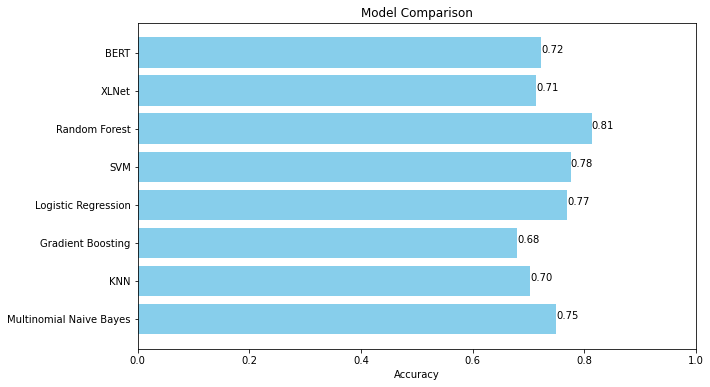

In [110]:
import matplotlib.pyplot as plt

# Dictionary containing model names as keys and accuracy values as values
accuracy_results = {
    "Multinomial Naive Bayes": 0.75,
    "KNN": 0.70375,
    "Gradient Boosting": 0.68,
    "Logistic Regression": 0.77,
    "SVM": 0.7758333333333334,
    "Random Forest": 0.81375,
    "XLNet": 0.7142,
    "BERT": 0.7233
}

# Extract model names and accuracy values from the dictionary
model_names = list(accuracy_results.keys())
accuracy_values = list(accuracy_results.values())

# Create a bar chart to compare accuracy values
plt.figure(figsize=(10, 6))
plt.barh(model_names, accuracy_values, color='skyblue')
plt.xlabel('Accuracy')
plt.title('Model Comparison')
plt.xlim(0, 1.0)

# Display the accuracy values on the bars
for index, value in enumerate(accuracy_values):
    plt.text(value, index, '{:.2f}'.format(value))

# Show the plot
plt.show()

## Model Accuracies After Hyperparameter Tuning

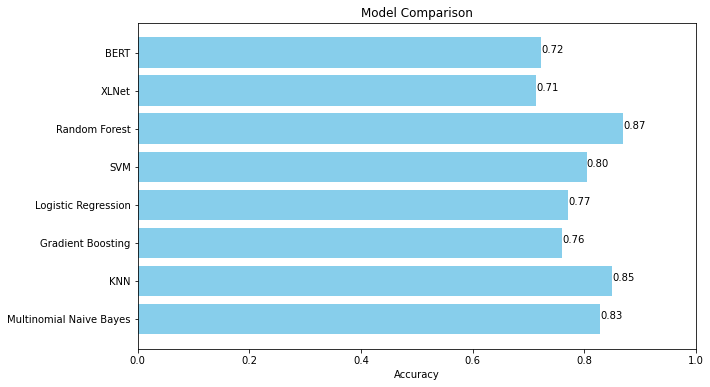

In [111]:
import matplotlib.pyplot as plt

# Dictionary containing model names as keys and accuracy values as values
accuracy_results = {
    "Multinomial Naive Bayes": 0.82875,
    "KNN": 0.85,
    "Gradient Boosting": 0.76125,
    "Logistic Regression": 0.77125,
    "SVM": 0.8045833333333333,
    "Random Forest": 0.87,
    "XLNet": 0.7142,
    "BERT": 0.7233
}

# Extract model names and accuracy values from the dictionary
model_names = list(accuracy_results.keys())
accuracy_values = list(accuracy_results.values())

# Create a bar chart to compare accuracy values
plt.figure(figsize=(10, 6))
plt.barh(model_names, accuracy_values, color='skyblue')
plt.xlabel('Accuracy')
plt.title('Model Comparison')
plt.xlim(0, 1.0)

# Display the accuracy values on the bars
for index, value in enumerate(accuracy_values):
    plt.text(value, index, '{:.2f}'.format(value))

# Show the plot
plt.show()